# Diagnosis of Covid19, Pneumonia and Tuberculosis

This notebook was created by Dror Chen and Hadas Dayan as part of the Data Sciense workshop at the Open University of Israel, Fall 2022.

**The notebook with its corresponding output can be found [here](https://github.com/drorchen/data-science-project/blob/main/FinalProject.ipynb).**

# Introduction

## What is Pneumonia?
Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli. Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing. The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases. Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. Diagnosis is often based on symptoms and physical examination. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis. The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.

For more detailed information:

https://en.wikipedia.org/wiki/Pneumonia


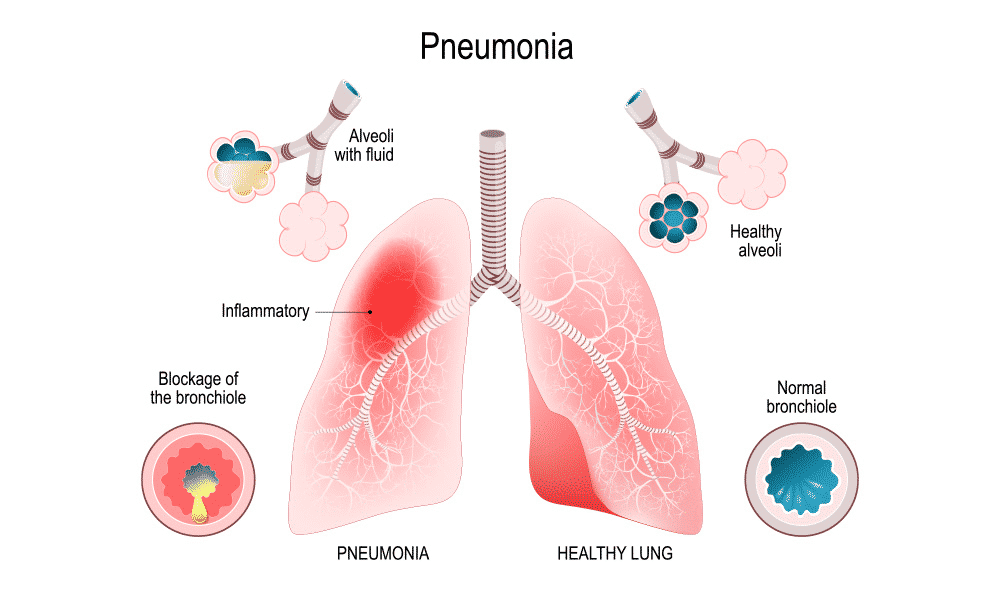

## What is Tuberculosis?
Tuberculosis is an infectious disease usually caused by Mycobacterium tuberculosis bacteria. Tuberculosis generally affects the lungs, but it can also affect other parts of the body. Most infections show no symptoms, in which case it is known as latent tuberculosis. Around 10% of latent infections progress to active disease which, if left untreated, kill about half of those affected. Typical symptoms of active TB are chronic cough with blood-containing mucus, fever, night sweats, and weight loss. Infection of

Tuberculosis is spread from one person to the next through the air when people who have active TB in their lungs cough, spit, speak, or sneeze. People with Latent TB do not spread the disease. Active infection occurs more often in people with HIV/AIDS and in those who smoke. Diagnosis of active TB is based on chest X-rays, as well as microscopic examination and culture of body fluids. Diagnosis of Latent TB relies on the tuberculin skin test or blood tests.

For more detailed information:

https://en.wikipedia.org/wiki/Tuberculosis

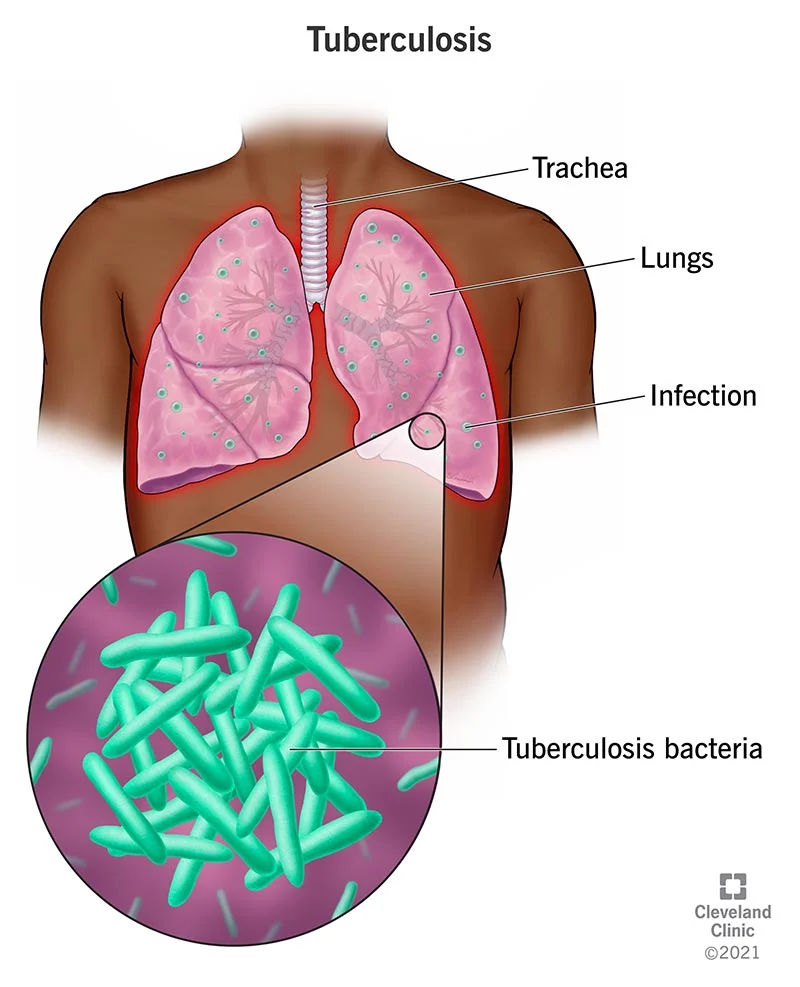

## What is Covid 19?
Coronavirus disease 2019 (COVID-19) is a contagious disease caused by a virus, the severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).

The symptoms of COVID‑19 are variable but often include fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those who develop symptoms noticeable enough to be classified as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% develop critical symptoms (respiratory failure, shock, or multiorgan dysfunction).

For more detailed information:

https://en.wikipedia.org/wiki/COVID-19

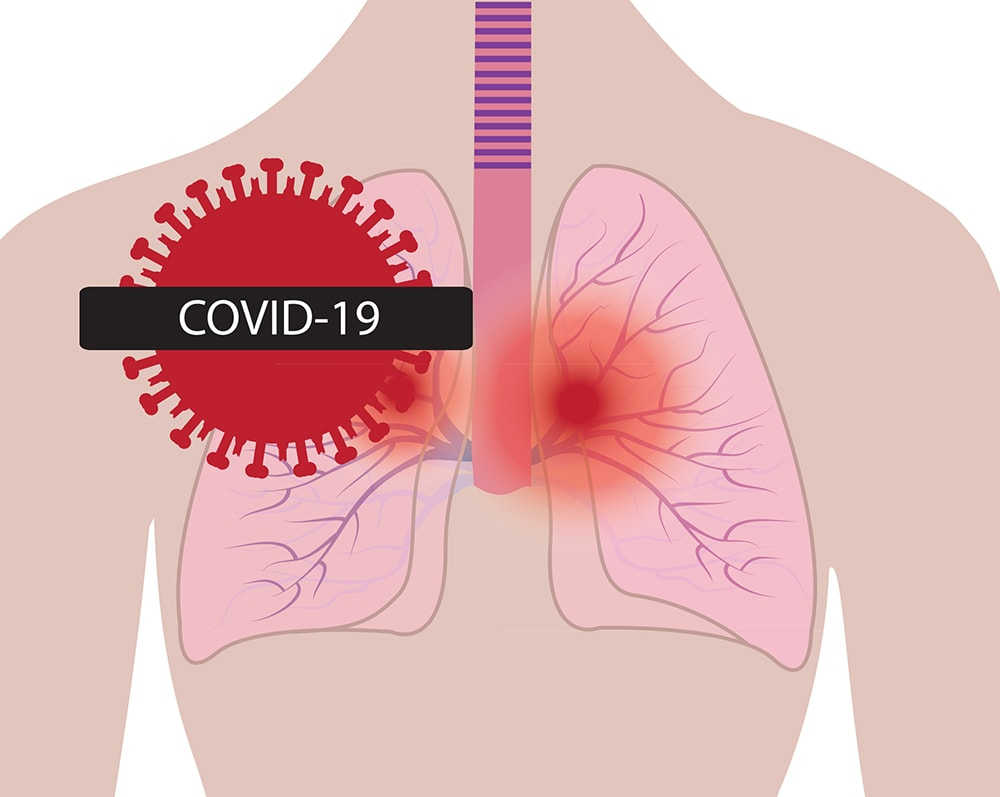


## Our data
### Building and processing the dataset

All images are preprocessed and resized to 224x224 in PNG format.
We are creating a dataset using other open source datasets by merging them. The dataset is highly imbalanced and it might contain duplicate images. The motivation for creating this dataset was to build a model that could correctly classify Tuberculosis, Pneumonia, Covid and Normal/Healthy Chest X-ray images.

### Content
A total of 20349 x-ray images are present, divided to 4 classes, COVID19, Normal, Pneuomonia and Tuberculosis.

12673 Normal images

10318 Pneuomonia images

1888 Tuberculosis images

1626 COVID19 images


##### Datasets that were used to create this imbalanced dataset:
1. https://www.kaggle.com/datasets/roshanmaur/imbalanced-tuberculosis-and-pnuemonia-dataset - A dataset containing 3 different classes of X-Ray images, healthy (normal), Pneumonia, and Tuberculosis images.
2. https://www.kaggle.com/datasets/sachinkumar413/covid-pneumonia-normal-chest-xray-images - A dataset containing 3 different classes of X-Ray images, healthy (normal), Pneumonia, and Covid19 images.
3. https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia - A dataset containing 2 different classes of X-Ray images, healthy (normal) and Pneumonia.


### Inspiration

Help the researcher and medical community to detect and classify COVID19, Tuberculosis and Pneumonia from Chest X-Ray Images using Deep Learning.


## Goal


Our purpose is to be able to identify diseases originating from the lungs via chest X-ray images. Both of us were highly interested in medical problems and image classification & analysis. We found a lot of datasets on kaggle for chest X-ray, however we wanted to mess with a large dataset with several types of classifications, so we decided to combine some chest x-ray datasets to increase our interest and take it for today's times to identify covid19 by chest x-rays.
We believe that the ability to detect lung diseases through an algorithm may shorten detection and diagnosis times, reduce human errors and consequently save patients' lives and reduce additional complications.

Today, machine learning has a phenomenal range of applications, including in health and diagnostics. Our project will explain the complete pipeline from data processing to predicting results, and it will explain how to build an X-ray image classification model from scratch to predict whether an X-ray scan shows presence of Pneumonia, Tuberculosis and Covid19. This is especially useful during these current times as Covid19 is known to cause Pneumonia.

We believe solving these groups of problems is highly important. Being able to detect diseases using an algorithem can potentially shorten detection and diagnosis times, reduce human error and subsequentially save patient lives and reduce further complications.
To reach our goal we will create a machine learning model with several architectures: RandomForest classifier, our own CNN, ResNet50V2 and ResNet34. We will examine the success of each of the models to determine the presence or absence of Pneumonia, Tuberculosis and Covid19 in a person from an X-ray image.

In [ ]:
import os
from os.path import isfile, join, isdir
import pandas as pd
from datasets import load_dataset, load_from_disk, load_metric
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from transformers import pipeline, AutoFeatureExtractor, AutoModelForImageClassification, Trainer, TrainingArguments
import transformers
from torchvision import transforms
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np
from tensorflow.keras.preprocessing import image as tsimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import hashlib
from keras.layers import Flatten
from skimage.io import imread
import cv2
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D
import filecmp
import itertools
from sklearn.utils import class_weight
from IPython.display import display
from IPython.display import Image as IPYImage
import torch
from scipy.special import softmax
from lime import lime_image
from skimage.segmentation import mark_boundaries
from sklearn.decomposition import PCA, IncrementalPCA
from skimage.feature import local_binary_pattern, hog
from PIL import Image, ImageOps
from sklearn.cluster import KMeans
import seaborn as sns
from skimage import exposure
from skimage.restoration import estimate_sigma
from sklearn.utils import shuffle
import shutil
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from tensorflow.keras.applications.vgg16 import VGG16
import fastai
import fastai.vision.all as fav
from transformers_interpret import ImageClassificationExplainer
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

We ran this notebook many times, so in order to reduce waiting time on each iteration, we are saving valuable training data history and the models themselves to the disk.

In [ ]:
name = "4_classes_equalized"
working_dir = os.getcwd()

resnet_2classes_load_model = True
resnet_2classes_save_model = False
resnet_2classes_train_again = False
pretrained_resnet50v2_2classes_saved_model_path = os.path.join(working_dir, f'ResNet50V2_2classes_{name}')
pretrained_resnet50v2_2classes_saved_model_fit_results_path = os.path.join(working_dir, f'ResNet50V2_2classes_{name}_History.bin')

overfitted_cnn_load_model = True
overfitted_cnn_save_model = False
overfitted_cnn_train_again = False
overfitted_cnn_saved_model_path = os.path.join(working_dir, f'CNN_overfitted_{name}')
overfitted_cnn_saved_model_fit_results_path = os.path.join(working_dir, f'CNN_overfitted_{name}_History.bin')

overfitted_cnn_load_5epochs_model = True
overfitted_cnn_save_5epochs_model = False
overfitted_cnn_train_5epochs_again = False
overfitted_cnn_saved_5epochs_model_path = os.path.join(working_dir, f'CNN_overfitted_5epochs_{name}')
overfitted_cnn_saved_5epochs_model_fit_results_path = os.path.join(working_dir, f'CNN_overfitted_5epochs_{name}_History.bin')

cnn_load_model = True
cnn_save_model = False
cnn_train_again = False
cnn_saved_model_path = os.path.join(working_dir, f'CNN_{name}')
cnn_saved_model_fit_results_path = os.path.join(working_dir, f'CNN_{name}_History.bin')

cnn_150epochs_load_model = True
cnn_150epochs_save_model = False
cnn_150epochs_train_again = False
cnn_150epochs_saved_model_path = os.path.join(working_dir, f'CNN_150Epochs_{name}')
cnn_150epochs_saved_model_fit_results_path = os.path.join(working_dir, f'CNN_150Epochs_{name}_History.bin')

resnet_load_model = True
resnet_save_model = False
resnet_train_again = False
pretrained_resnet50v2_saved_model_path = os.path.join(working_dir, f'ResNet50V2_{name}')
pretrained_resnet50v2_saved_model_fit_results_path = os.path.join(working_dir, f'ResNet50V2_{name}_History.bin')

vgg16_load_model = True
vgg16_save_model = False
vgg16_train_again = False
pretrained_vgg16_saved_model_path = os.path.join(working_dir, f'VGG16_{name}')
pretrained_vgg16_saved_model_fit_results_path = os.path.join(working_dir, f'VGG16_{name}_History.bin')

fastai_models_path = os.path.expanduser('~\\Documents\\FastAI')
fastai_resnet34_load_model = True
fastai_resnet34_log_append = True
fastai_resnet34_save_model = False
fastai_resnet34_calculate_lr = False
fastai_resnet34_calculate_plot_top_losses = False
fastai_resnet34_calculate_confusion_matrix = False
fastai_resnet34_model_name = "ResNet34"
fastai_resnet34_saved_model_log_path = os.path.join(working_dir, f'ResNet34_History_{name}.csv')
fastai_resnet34_saved_lr_find_plot = os.path.join(working_dir, f'ResNet34_lr_find_plot.png')
fastai_resnet34_saved_plot_top_losses = os.path.join(working_dir, f'ResNet34_plot_top_losses.png')
fastai_resnet34_saved_confusion_matrix = os.path.join(working_dir, f'ResNet34_confusion_matrix.png')
fastai_resnet34_saved_lrs = os.path.join(working_dir, f'ResNet34_lrs.bin')

# Case Study in Medical Services

Computer-Aided Diagnosis (CADx) systems could provide valuable benefits for disease diagnosis including but not limited to improving the quality and consistency of the predictions and reducing medical mistakes as they are not subject to human error. Although most existing studies focus on diagnosis based on medical images such as chest X-Ray (CXR) images ,the radiology reports often contain substantial information (e.g. patient history and previous studies) that are difficult to be detected from the image alone. Besides, diagnosis from both image and text is more closely aligned with disease diagnosis by human experts.

From a study we did with radiologists, we discovered that one of the problems with using deep learning for medical image analysis comes from the way an X-Ray image is generated. A chest X-Ray is a photo that had been converted from 3D to 2D, which causes a loss of rich 3D anatomical information, and thus the performance is inevitably compromised.
Therefore, to solve these imaging tasks, 3D imaging modalities (e.g., CT and MRI) must be used.

There have been promising efforts to apply machine learning to aid in the diagnosis of Lung diseases based on CT scans. Despite the success of these methods, the fact remains that COVID-19 is an infection that is likely to be experienced by communities of all sizes. Chest X-Rays (CXRs) play an important role in patient care, it is a painless and noninvasive examination method suitable for high populations with relatively low costs and quick to perform. Therefore, they are more accessible to healthcare providers working in smaller and/or remote regions. 
Radiologists can use CXR features to determine the type of Pneumonia and the underlying pathogenesis. X-Ray is one of the most common radiological examination methods for screening and diagnosing chest diseases, as well as the main means of classifying and screening Pneumonia, Tuberculosis and Breast Cancer.
X-Ray diagnosis by a radiologist has a lot of influence on the person's position, the deep inhalation, the patient's body structure, the amount of radiation from the device.

We asked a radiologist to help us understand better how radiologists identify lung diseases. He marked the objects on the images which helped him identify each disease:

In [ ]:
radiolog_images_path = 'radiolog'
images = [(os.path.join(radiolog_images_path, p), p) for p in os.listdir(radiolog_images_path)]
fig, axes = plt.subplots(1, len(images), figsize=(15,15))
for i in range(len(images)):
    image_path, image_title = images[i]
    image = imread(image_path)
    axes[i].imshow(image)
    axes[i].axis("off")
    axes[i].set_title(image_title)
plt.show()

Ways of diagnosis: (https://radiologyassistant.nl/chest/chest-x-ray/lung-disease)

1. Pneumonia - check if there is a shadow on the lung tissue, small bags that fill with pus and check if the lung is blocked 
2. Tuberculosis - holes filled with air which are edemas, inflammatory cells, bacteria.
3. Covid19 - bilateral sacs can be seen, losing many of the lung views and it is not in the middle of the lung.

One of the things we noticed during our research is that our datasets contain images of children, therefore it is difficult to identify the disease according to the algorithm, a child's chest X-Ray looks different and the diseases also behave and look different in the photographs.

# Exploratory data analysis

## Loading the data

Defining the directories where our data sits, these are constants anyway so we're going to use these variables in future segments of our code.

In [ ]:
first_data_dir = os.path.join(working_dir, "Imbalanced Tuberculosis and Pneumonia dataset")
second_data_dir = os.path.join(working_dir, "COVID19+PNEUMONIA+NORMAL Chest X-Ray Image Dataset")
third_data_dir = os.path.join(working_dir, "ChestXRays")

In [ ]:
normal_dirs = [
    os.path.join(first_data_dir, "Normal"),
    os.path.join(first_data_dir, "universal_test/Normal"),
    os.path.join(second_data_dir, "NORMAL"),
    os.path.join(third_data_dir, "test/NORMAL"),
    os.path.join(third_data_dir, "val/NORMAL"),
    os.path.join(third_data_dir, "train/NORMAL"),
]
covid_dirs = [
    os.path.join(second_data_dir, "COVID")
]
pneumonia_dirs = [
    os.path.join(first_data_dir, "Pneumonia"),
    os.path.join(first_data_dir, "universal_test/Pneumonia"),
    os.path.join(second_data_dir, "PNEUMONIA"),
    os.path.join(third_data_dir, "test/PNEUMONIA"),
    os.path.join(third_data_dir, "val/PNEUMONIA"),
    os.path.join(third_data_dir, "train/PNEUMONIA"),
]
tuberculosis_dirs = [
    os.path.join(first_data_dir, "Tuberculosis"),
    os.path.join(first_data_dir, "universal_test/Tuberculosis")
]

data = [
    (normal_dirs, "Normal"),
    (covid_dirs, "Covid"),
    (pneumonia_dirs, "Pneumonia"),
    (tuberculosis_dirs, "Tuberculosis"),
]

In [ ]:
labeled_data = {}
for paths, label in data:
    all_label_files = []
    for path in paths:
        files = [os.path.join(path, f) for f in os.listdir(path)]
        all_label_files += files
    labeled_data[label] = all_label_files
    print(f"Found {len(labeled_data[label])} {label} images")

We are planning to store data on each image, so we build a DataFrame to hold the collected data.

In [ ]:
def extract_data(paths, label):
    df = pd.DataFrame()
    df["path"] = paths
    df["label"] = [label for i in range(len(paths))]
    return df

labeled_dataframe = pd.DataFrame()
for label, paths in labeled_data.items():
    labeled_dataframe = pd.concat([labeled_dataframe, extract_data(paths, label)], ignore_index=True)
del labeled_data
labeled_dataframe

# First look at the data

Lets look at the distribution of our data across the different classes.

In [ ]:
def show_dataset_distribution(data):
    balance_plot_data = data["label"].value_counts().rename_axis('label').reset_index(name='count')
    plt.bar(balance_plot_data["label"], balance_plot_data["count"])
    for i, value in enumerate(balance_plot_data["count"]):
        plt.text(i, value, value, ha="center", va="bottom")
    plt.show()

In [ ]:
show_dataset_distribution(labeled_dataframe)

We can see that there are plenty more 'Normal' X-Ray images, we would probably need to take that into consideration when training our models.
Also, we don't have a lot of 'Tuberculosis' and 'Covid' samples, which might lead our model training to be less effective for those classes.

Lets take a look at some samples from each class:

In [ ]:
for label, label_data in labeled_dataframe.groupby("label"):
    for i, row in label_data.sample(5).reset_index(drop=True).iterrows():
        image = imread(row["path"])
        image = cv2.resize(cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE), (224,224))
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.axis("off")
    plt.title(label)
    plt.show()

We can see that Covid samples contain much more "white fog" than the other classes. We can also see some faulty images:

1. Tilted and cut image.
2. White rectangle.
3. Letters.

We will try to deal with this later.


In [ ]:
def get_dataset_number(path):
    dataset_numbers = {first_data_dir: 0, second_data_dir: 1, third_data_dir: 2}
    for key, value in dataset_numbers.items():
        if key in path:
            return value
    return -1

labeled_dataframe['dataset'] = labeled_dataframe['path'].apply(lambda path: get_dataset_number(path))

In [ ]:
def show_each_dataset_distribution(data):
    for dataset_i, df in data.groupby("dataset"):
        balance_plot_data = df["label"].value_counts().rename_axis('label').reset_index(name='count')
        plt.bar(balance_plot_data["label"], balance_plot_data["count"])
        for i, value in enumerate(balance_plot_data["count"]):
            plt.text(i, value, value, ha="center", va="bottom")
        plt.title(f"Dataset {dataset_i}")
        plt.show()

In [ ]:
show_each_dataset_distribution(labeled_dataframe)

We can see that the first dataset is by far the largest.

## Clean the data

### Sample duplication

Because we use 3 different datasets, we want to make sure there aren't any duplicate images across them, so we compute each sample's SHA256 hash and make sure to take only one copy of each image.

In [ ]:
def get_unique_files(paths):
    hash_map = {}
    duplicates_count = 0

    for path in paths:
        with open(path, 'rb') as f:
            file_hash = hashlib.sha256(f.read()).hexdigest()
        if file_hash not in hash_map:
            hash_map[file_hash] = [path]
        elif not any([filecmp.cmp(f, path) for f in hash_map[file_hash]]):
            hash_map[file_hash].append(path)
        else:
            duplicates_count += 1
    return (list(itertools.chain.from_iterable([paths for paths_hash, paths in hash_map.items()])), duplicates_count)

labeled_data = {}
for paths, label in data:
    all_label_files = []
    for path in paths:
        files = [os.path.join(path, f) for f in os.listdir(path)]
        all_label_files += files
    labeled_data[label], duplicates_count = get_unique_files(all_label_files)
    print(f"Found {len(labeled_data[label])} {label} images, encountered {duplicates_count} duplicates.")

We found many duplicates!

In [ ]:
def extract_data(paths, label):
    df = pd.DataFrame()
    df["path"] = paths
    df["label"] = [label for i in range(len(paths))]
    return df

labeled_dataframe = pd.DataFrame()
for label, paths in labeled_data.items():
    labeled_dataframe = pd.concat([labeled_dataframe, extract_data(paths, label)], ignore_index=True)
del labeled_data
labeled_dataframe['dataset'] = labeled_dataframe['path'].apply(lambda path: get_dataset_number(path))
labeled_dataframe

In [ ]:
show_dataset_distribution(labeled_dataframe)
show_each_dataset_distribution(labeled_dataframe)

After removing duplicates from the data, we can see that dataset 2 provides almost no new data.

### Noise analysis

Let's start investigating the quality of images in our datasets by taking a look at the estimated guassian noise standard deviation of the xray images. At first lets just take a look at a single image and get the sigma for every channel separatly.

In [ ]:
def cv_image(file_name):
    return cv2.resize(cv2.cvtColor(imread(file_name), cv2.COLOR_BGR2RGB), (224, 224))

single_image_row = labeled_dataframe.sample(1).iloc[0]
single_image = cv_image(single_image_row["path"])
plt.imshow(single_image)
plt.title(single_image_row["label"])
plt.axis("off")
plt.show()

Noise estimation breakdown by channel for a random sample

In [ ]:
estimate_sigma(single_image, channel_axis=2)

Noise estimation breakdown by average of channel sigmas of all color channels for a random sample

In [ ]:
estimate_sigma(single_image, channel_axis=2, average_sigmas=True)

Now lets calculate the noise estimation for all images

In [ ]:
noise_all = [estimate_sigma(cv_image(image_path), channel_axis=2) for image_path in labeled_dataframe["path"]]

In [ ]:
noise_all_pd = pd.DataFrame(data=noise_all, columns=['Red','Green','Blue'])

We will also calculate the average estimation between channels for each image as well

In [ ]:
noise_all_pd['Overall'] = noise_all_pd.mean(numeric_only=True, axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=noise_all_pd[['Red','Green','Blue']], stat='count', multiple='dodge', palette=['red', 'green', 'blue'])

The above histogram represents the number of images per amount of noise in an image per channel. We can see a peak around 1, which means this is probably the standard noise estimation in valid images.

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=noise_all_pd[['Overall']], stat='count', multiple='dodge', palette=['purple'])

The above histogram represents the number of images per amount of noise in an image as an average in all color channels. We can see a peak around 1 as well, which is to be expected from the previous histogram.

Lets take a look at the images with almost no noise in all channels:

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(15,15))

shuffled_no_noise_data = noise_all_pd[(noise_all_pd['Red'] < 0.25) & (noise_all_pd['Blue'] < 0.25) & (noise_all_pd['Green'] < 0.25)]
index_list = shuffled_no_noise_data.head(25).index

for (i, j, current_subplot) in zip(range(25), index_list, ax.flat):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    current_subplot.imshow(cv_image(labeled_dataframe["path"][j]))
    current_subplot.xaxis.label.set_text(f'{labeled_dataframe["label"][j]} - Img {i}')
    
plt.show()

We can clearly see those are faulty images, we will have to remove them from our data.

Lets take a look at the images with almost no noise by the average of all channels:

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(15,15))

no_noise_data = noise_all_pd[noise_all_pd['Overall'] < 0.25].sort_values('Overall',  ascending=True).head(25)
index_list = no_noise_data.index

for (i, j, current_subplot) in zip(range(25), index_list, ax.flat):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    current_subplot.imshow(cv_image(labeled_dataframe["path"][j]))
    current_subplot.xaxis.label.set_text(f'{labeled_dataframe["label"][j]} - Img {i}')
    
plt.show()

Seems to be the same faulty images as before.

We will check if there was a difference between checking the overall noise average, and checking each channel:

In [ ]:
noise_all_pd[(noise_all_pd['Red'] < 0.25) & (noise_all_pd['Blue'] < 0.25) & (noise_all_pd['Green'] < 0.25)].count()

In [ ]:
noise_all_pd[noise_all_pd['Overall'] < 0.25].count()

In [ ]:
merged_df = noise_all_pd[noise_all_pd['Overall'] < 0.25].merge(noise_all_pd[(noise_all_pd['Red'] < 0.25) & (noise_all_pd['Blue'] < 0.25) & (noise_all_pd['Green'] < 0.25)], how = 'left', indicator = True)

In [ ]:
len(merged_df[merged_df['_merge'] != 'both'])

It seems that we found the same faulty images, so it didn't really help to check both.

Lets remove the faulty images from our data:

In [ ]:
labeled_dataframe.drop(labeled_dataframe[noise_all_pd['Overall'] < 0.25].index, axis=0, inplace=True)

### Contrast analysis

Let's start investigating the quality of images in our datasets by taking a look at the contrast level of each image.

In [ ]:
def is_low_contrast_func(path, fraction_threshold):
    return bool(exposure.is_low_contrast(cv_image(path), fraction_threshold=fraction_threshold))

We have experimented with the threshold value, and found that 0.2 had the best results.

In [ ]:
labeled_dataframe['is_low_contrast'] = labeled_dataframe['path'].apply(is_low_contrast_func, fraction_threshold=0.2)

In [ ]:
ax = sns.countplot(data=labeled_dataframe, x='is_low_contrast')
ax.set(xlabel='Is low contrast?', ylabel='Number of images')
plt.show()

The bar plot above reflects how any images in our data set are with a low contrast rate. Looks like most of our images are not low contrast. This corresponds with what we've seen earlier in regards to the amount of noise in the image, a lot of images with low noise rates are also low contrast and monotoneus. Lets deep dive into the images that are low contrast.

In [ ]:
fig, ax = plt.subplots(8, 8, figsize=(15,15))

shuffled_low_contrast = labeled_dataframe[labeled_dataframe["is_low_contrast"] == True]

for i, current_subplot in zip(range(len(shuffled_low_contrast)), ax.flat):
    current_row = shuffled_low_contrast.iloc[i]

    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    current_subplot.imshow(cv_image(current_row['path']))
    current_subplot.xaxis.label.set_text(f"{current_row.label} - Img {i}")
plt.show()

Lets remove the faulty and low quality images from our data:

In [ ]:
labeled_dataframe.drop(labeled_dataframe[labeled_dataframe['is_low_contrast'] == True].index, axis=0, inplace=True)
labeled_dataframe.drop(columns=['is_low_contrast'], inplace=True)

## Analyzing quality of images

After manually looking at the datasets, we encountered some images with big white rectangles. This is something that can confuse the models while training, and we want to remove these images.
We will first look at two images:

In [ ]:
first_image = cv2.resize(cv2.imread("Imbalanced Tuberculosis and Pneumonia dataset/Tuberculosis/Tuberculosis-239.png"), (224, 224))
second_image = cv2.resize(cv2.imread("ChestXRays/train/NORMAL/IM-0228-0001.jpeg"), (224, 224))

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].set_title(f"With rectangles")
ax[0].imshow(first_image)

ax[1].set_title(f"Without rectangles")
ax[1].imshow(second_image)

plt.show()

We will first threshold the image to create a binary image, with a very high threshold to spot only extremley intense white.

In [ ]:
gray_first_image = cv2.cvtColor(first_image, cv2.COLOR_RGB2GRAY)
gray_second_image = cv2.cvtColor(second_image, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

blur = cv2.bilateralFilter(gray_first_image,1,75,75)
_, first_binary_image = cv2.threshold(blur, 252, 255, cv2.THRESH_BINARY)
ax[0].set_title(f"With rectangles")
ax[0].imshow(first_binary_image)

blur2 = cv2.bilateralFilter(gray_second_image,9,75,75)
_, second_binary_image = cv2.threshold(blur2, 252, 255, cv2.THRESH_BINARY)
ax[1].set_title(f"Without rectangles")
ax[1].imshow(second_binary_image)

plt.show()

Now we will try to find the rectangles:

In [ ]:
first_contours, _ = cv2.findContours(first_binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
second_contours, _ = cv2.findContours(second_binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
area_threshold = 200

def display_rectangles(img, contours, i):
    ax[i].imshow(img)
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.05 * perimeter, True)
        if len(approx) == 4:
            top_left, bottom_left, bottom_right, top_right = approx
            x, y, w, h = top_left[0][0], top_left[0][1], top_right[0][0] - top_left[0][0], bottom_left[0][1] - top_left[0][1]
            area = w * h
            if area >= area_threshold:
                rect = img[y:y+h, x:x+w]
                ax[i].imshow(cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2))
                
display_rectangles(first_image, first_contours, 0)
display_rectangles(second_image, second_contours, 1)
    
plt.show()

We found the guilty rectangles. Lets check the entire dataset:

In [ ]:
def has_rectangle(path):
    img = cv2.cvtColor(cv2.cvtColor(cv2.resize(imread(path), (224, 224)), cv2.COLOR_BGR2RGB), cv2.COLOR_RGB2GRAY)
    blur = cv2.bilateralFilter(img,1,75,75)
    threshold, binary_img = cv2.threshold(blur, 252, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.05 * perimeter, True)
        if len(approx) == 4:
            top_left, bottom_left, bottom_right, top_right = approx
            x, y, w, h = top_left[0][0], top_left[0][1], top_right[0][0] - top_left[0][0], bottom_left[0][1] - top_left[0][1]
            area = w * h
            if area >= area_threshold:
                return True
    return False

In [ ]:
labeled_dataframe["has_rectangle"] = labeled_dataframe["path"].apply(has_rectangle)

Lets see which images we found:

In [ ]:
labeled_dataframe[labeled_dataframe["has_rectangle"] == True]["label"].value_counts().rename_axis('label').reset_index(name='count')

Looks like we found many images, lets analyze each of the classes:

In [ ]:
def show_rectangle_grid(label, plot_size, silent=False):
    fig, ax = plt.subplots(plot_size, plot_size, figsize=(15,15))

    has_rectangles = labeled_dataframe[(labeled_dataframe["has_rectangle"] == True) & (labeled_dataframe["label"] == label)]

    for i, current_subplot in zip(range(len(has_rectangles)), ax.flat):
        current_row = has_rectangles.iloc[i]

        plt.subplot(plot_size,plot_size,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        current_subplot.imshow(cv_image(current_row['path']))
        if not silent:
            current_subplot.xaxis.label.set_text(f"{current_row.label} - Img {i}")
    plt.show()

In [ ]:
show_rectangle_grid("Normal", 4)

We can see that all the Normal images we found have letters on them. We will discard of these images.

In [ ]:
show_rectangle_grid("Tuberculosis", 14, silent=True)

We can see that all the Tuberculosis images we found either have letters on them, white rectangles or are low quality. We will discard of these images.

In [ ]:
show_rectangle_grid("Covid", 6)

We can see that all the Covid images we found either have letters on them, white rectangles or symbols (for example arrows). We will discard of these images.

In [ ]:
labeled_dataframe.drop(labeled_dataframe[labeled_dataframe["has_rectangle"] == True].index, axis=0, inplace=True)
labeled_dataframe.drop(columns=['has_rectangle'], inplace=True)

We also encountered some images with big black spaces. This is something that can confuse the models while training, and we want to remove these images.
We will first look at two images:

In [ ]:
first_image = cv2.resize(cv2.imread(r"Imbalanced Tuberculosis and Pneumonia dataset/Normal/Normal-3323.png"), (224, 224))
second_image = cv2.resize(cv2.imread(r"ChestXRays/train/NORMAL/IM-0228-0001.jpeg"), (224, 224))

fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].set_title(f"With black space")
ax[0].imshow(first_image)

ax[1].set_title(f"Without black space")
ax[1].imshow(second_image)

plt.show()

We will do the same as we did with the white rectangles, but now we will invert the colors of the images.

In [ ]:
gray_first_image = cv2.cvtColor(cv2.bitwise_not(first_image), cv2.COLOR_RGB2GRAY)
gray_second_image = cv2.cvtColor(cv2.bitwise_not(second_image), cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(10,5))

blur = cv2.bilateralFilter(gray_first_image,1,75,75)
_, first_binary_image = cv2.threshold(blur, 252, 255, cv2.THRESH_BINARY)
ax[0].set_title(f"With rectangles")
ax[0].imshow(first_binary_image)

blur2 = cv2.bilateralFilter(gray_second_image,1,75,75)
_, second_binary_image = cv2.threshold(blur2, 252, 255, cv2.THRESH_BINARY)
ax[1].set_title(f"Without rectangles")
ax[1].imshow(second_binary_image)

plt.show()

Now we will try to find the black spaces:

In [ ]:
first_contours, _ = cv2.findContours(first_binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
second_contours, _ = cv2.findContours(second_binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
area_threshold = 13000
sum_of_area_threshold = 18000

def display_rectangles(img, contours, i):
    ax[i].imshow(img)
    sum_of_area = 0
    result = False
    for contour in contours:
        area = cv2.contourArea(contour)
        sum_of_area += area
        cv2.drawContours(img, contour, -1, (0, 0, 255), 3)
        cv2.fillPoly(img, pts =[contour], color=(0,255,0))
        ax[i].imshow(img)
        if area > area_threshold:
            result = True
            
    if sum_of_area > sum_of_area_threshold:
        result = True
    ax[i].set_title(f"Has massive black space: {result}")
              
display_rectangles(first_image, first_contours, 0)
display_rectangles(second_image, second_contours, 1)
    
plt.show()

In [ ]:
def has_black_space(path):
    img = cv2.cvtColor(cv2.cvtColor(cv2.resize(imread(path), (224, 224)), cv2.COLOR_BGR2RGB), cv2.COLOR_RGB2GRAY)
    blur = cv2.bilateralFilter(cv2.bitwise_not(img),1,75,75)
    threshold, binary_img = cv2.threshold(blur, 252, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    sum_of_area = 0
    result = False
    for contour in contours:
        area = cv2.contourArea(contour)
        sum_of_area += area
        if area > area_threshold:
            result = True
            
    if sum_of_area > sum_of_area_threshold:
        result = True
        
    return result

In [ ]:
labeled_dataframe["has_black_space"] = labeled_dataframe["path"].apply(has_black_space)

Lets see which images we found:

In [ ]:
labeled_dataframe[labeled_dataframe["has_black_space"] == True]["label"].value_counts().rename_axis('label').reset_index(name='count')

Looks like we found many images, lets analyze each of the classes:

In [ ]:
def show_blackspace_grid(label, plot_size, silent=False):
    fig, ax = plt.subplots(plot_size, plot_size, figsize=(15,15))

    has_rectangles = labeled_dataframe[(labeled_dataframe["has_black_space"] == True) & (labeled_dataframe["label"] == label)]

    for i, current_subplot in zip(range(len(has_rectangles)), ax.flat):
        current_row = has_rectangles.iloc[i]

        plt.subplot(plot_size,plot_size,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        current_subplot.imshow(cv_image(current_row['path']))
        if not silent:
            current_subplot.xaxis.label.set_text(f"{current_row.label} - Img {i}")
    plt.show()

In [ ]:
show_blackspace_grid("Normal", 6)

In [ ]:
show_blackspace_grid("Tuberculosis", 4)

In [ ]:
show_blackspace_grid("Pneumonia", 4)

In [ ]:
show_blackspace_grid("Covid", 3)

We can see that all the images we found have some sort of black border. Lets remove them from our data.

In [ ]:
labeled_dataframe.drop(labeled_dataframe[labeled_dataframe["has_black_space"] == True].index, axis=0, inplace=True)
labeled_dataframe.drop(columns=['has_black_space'], inplace=True)

# Brightness analysis

Lets look at the brightness level of each image in our data.

In [ ]:
def get_brightness(image):
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    L = L/np.max(L)
    return np.mean(L)

In [ ]:
for label, label_data in labeled_dataframe.groupby("label"):
    print(f"{label}:")
    for i, row in label_data.sample(5).reset_index(drop=True).iterrows():
        image = cv_image(row["path"])
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.title(f"{get_brightness(image):.2f}")
        plt.axis("off")
    plt.show()

In [ ]:
labeled_dataframe["brightness"] = labeled_dataframe["path"].apply(lambda path: get_brightness(cv_image(path)))

Lets look at the distribution across datasets and classes:

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
print("Brightness distribution:")

for label, df in labeled_dataframe.groupby("label"):
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    amount_dataset_0 = len(df["brightness"][df["dataset"] == 0])
    if amount_dataset_0 > 0:
        ax[0].hist(df["brightness"][df["dataset"] == 0], bins=100, density=True)
        
    amount_dataset_1 = len(df["brightness"][df["dataset"] == 1])
    if amount_dataset_1 > 0:
        ax[1].hist(df["brightness"][df["dataset"] == 1], bins=100, density=True)

    ax[0].set_title(f"{amount_dataset_0} {label} images in dataset 0", fontsize=14)
    ax[1].set_title(f"{amount_dataset_1} {label} images in dataset 1", fontsize=14)

plt.show()

We can see that the datasets have similar peaks on 0.5~0.55

In [ ]:
def equalizeHist(img):
    return cv2.cvtColor(cv2.equalizeHist(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)), cv2.COLOR_GRAY2RGB)

In [ ]:
def show_brightness_grid(label, plot_size, threshold, equalize=False, silent=False):
    fig, ax = plt.subplots(plot_size, plot_size, figsize=(5,5))

    has_rectangles = labeled_dataframe[(labeled_dataframe["brightness"] >= threshold) & (labeled_dataframe["label"] == label)]

    for i, current_subplot in zip(range(len(has_rectangles)), ax.flat):
        current_row = has_rectangles.iloc[i]

        plt.subplot(plot_size,plot_size,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        img = cv_image(current_row['path'])
        if equalize:
            img = equalizeHist(img)
        current_subplot.imshow(img)
        if not silent:
            current_subplot.xaxis.label.set_text(f"{current_row.label} - Img {i}")
    plt.show()

Lets see some of the images that are marked with high brightness level:

In [ ]:
show_brightness_grid("Normal", 2, 0.75)

In [ ]:
show_brightness_grid("Tuberculosis", 2, 0.8)

In [ ]:
show_brightness_grid("Pneumonia", 2, 0.8)

In [ ]:
show_brightness_grid("Covid", 2, 0.7)

It seems obvious that these images are a lot brighter than the standard image we have in the dataset. We want to try and normalize the brightness of the samples. We will use histogram equalization to do that. Lets see the initial results:

In [ ]:
show_brightness_grid("Normal", 2, 0.75, equalize=True)

In [ ]:
show_brightness_grid("Tuberculosis", 2, 0.8, equalize=True)

In [ ]:
show_brightness_grid("Pneumonia", 2, 0.8, equalize=True)

In [ ]:
show_brightness_grid("Covid", 2, 0.7, equalize=True)

It looks way clearer, these samples seem to be usable after using histogram equalization, as opposed to their former state.

# Another look at the data

Lets look at the distribution of our data across the different classes after cleaning it a bit.

In [ ]:
show_dataset_distribution(labeled_dataframe)
show_each_dataset_distribution(labeled_dataframe)

We now have by far a lot more Normal images. We want to reduce overfitting the models later on, so lets remove Normal images to match at least the amount of Pneumonia images. We first get rid of the last dataset which contains only a small amount of Normal images.

We also encountered memory errors because we had too many images in memory (It is required for our next steps, like PCA) so we must discard some of them.

In [ ]:
labeled_dataframe.drop(labeled_dataframe[labeled_dataframe["dataset"] == 2].index, inplace=True)

In [ ]:
labels_distribution = labeled_dataframe["label"].value_counts().rename_axis('label').reset_index(name='count')
balance_dict = dict(zip(labels_distribution["label"], labels_distribution["count"]))
dataset_normal_balance = labeled_dataframe["dataset"][labeled_dataframe["label"] == "Normal"].value_counts().rename_axis('dataset').reset_index(name='count')
dataset_normal_balance_dict = dict(zip(dataset_normal_balance["dataset"], dataset_normal_balance["count"]))

In [ ]:
print(balance_dict)
print(dataset_normal_balance_dict)

In [ ]:
amount_to_remove = balance_dict["Normal"] - balance_dict["Pneumonia"]
amount_to_remove_from_dataset = {}
for i in range(len(dataset_normal_balance_dict)):
    amount_to_remove_from_dataset[i] = int(np.floor((dataset_normal_balance_dict[i] / balance_dict["Normal"]) * amount_to_remove))
if amount_to_remove > sum(amount_to_remove_from_dataset.values()):
    amount_to_remove_from_dataset[0] += (amount_to_remove - sum(amount_to_remove_from_dataset.values()))
amount_to_remove_from_dataset    

In [ ]:
for dataset_i, amount in amount_to_remove_from_dataset.items():
    samples_to_remove = labeled_dataframe[(labeled_dataframe["dataset"] == dataset_i) & (labeled_dataframe["label"] == "Normal")]
    labeled_dataframe.drop(samples_to_remove.index[:amount], inplace=True)

We removed Normal images from all datasets proportional to their size, so we won't remove a dataset completely.

In [ ]:
show_dataset_distribution(labeled_dataframe)
show_each_dataset_distribution(labeled_dataframe)

The above plot shows the final classes balance, we can now continue to use the data.

## Feature extraction

### Normalize images

We will start with normalizing the samples. This helps us balance the scale of the features and is often a preprocessing step for machine learning algorithms that work with image data. This should also help us eliminate obvious characteristics differences across datasets, for example brightness level of the image.

In [ ]:
def normalize_image(img):
    return cv2.normalize(img, None, 0.0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_64FC1)

In [ ]:
for label, df in labeled_dataframe.groupby("label"):
    row = df.sample(1).iloc[0]
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    
    img = equalizeHist(cv_image(row['path']))
    ax[0].set_title(f"Original {row.label} image pixels [0-255]")
    ax[0].imshow(img)
    
    ax[1].set_title(f"Normalized {row.label} image pixels [0.0-1.0]")
    ax[1].imshow(normalize_image(img))
    
    plt.show()

We apply both equalizeHist and normalize_image functions.

In [ ]:
labeled_dataframe['equalized_image'] = labeled_dataframe['path'].apply(lambda path: equalizeHist(cv_image(path)))

In [ ]:
labeled_dataframe['normalized_image'] = labeled_dataframe['equalized_image'].apply(lambda equalized_image: normalize_image(equalized_image))

### Histogram of Oriented Gradients

Histogram of Oriented Gradients (HOG) is a feature descriptor used in computer vision for object detection tasks. It describes the visual appearance of an image by representing the intensity gradients in different orientations. The HOG feature descriptor is calculated by dividing an image into small cells and calculating a histogram of the gradient orientations within each cell. This results in a histogram representation of the gradient information in an image, which is invariant to translations, rotations, and scaling.

In [ ]:
def extract_hog(img):
    return hog(img, orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True, channel_axis=2)

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
i = 0
for label, frame in labeled_dataframe.groupby("label"):
    sample_image = frame.sample(1).iloc[0]
    
    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(extract_hog(sample_image['normalized_image'])[1], in_range=(0, 10))

    ax[i,0].axis('off')
    ax[i,0].imshow(sample_image["normalized_image"])
    ax[i,0].set_title(f'{label} image from dataset {sample_image["dataset"]}')
    ax[i,1].axis('off')
    ax[i,1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax[i,1].set_title('Histogram of Oriented Gradients')
    
    i += 1

plt.show()

It looks like a good way to see the intesities in the lungs.

In [ ]:
labeled_dataframe['hog_features'] = labeled_dataframe['normalized_image'].apply(lambda img: extract_hog(img)[0])

### Local Binary Patterns

Local Binary Patterns (LBP) is a texture descriptor used in computer vision for tasks such as object recognition, face recognition, and texture classification. It is based on the idea of summarizing the local texture information of an image into a compact and discriminative feature representation.

LBP works by thresholding the difference between the intensity of a pixel and its neighbors, resulting in a binary pattern. This pattern is then transformed into a decimal representation and used as a feature for classification. The LBP descriptor is calculated on small neighborhoods or blocks of an image, which provides a robust representation of the local texture information.

LBP is computationally efficient and has been widely used in various applications, such as object recognition, face recognition, and texture classification, due to its good performance and simplicity.

LBP works with grayscaled images only:

In [ ]:
gray_single_image = cv2.cvtColor(single_image, cv2.COLOR_RGB2GRAY)

In [ ]:
lbp_single_image = local_binary_pattern(gray_single_image, 8, 1, "uniform")    

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

ax[0].set_title('Original image')
ax[0].imshow(single_image)

ax[1].set_title('Gray scale image')
ax[1].imshow(gray_single_image)

ax[2].set_title('LBP output image')
ax[2].imshow(lbp_single_image, )

plt.show()

In [ ]:
n_points = 8
radius = 1
def get_lbp_hist(image):
    gray_image = cv2.cvtColor(image.astype('float32'), cv2.COLOR_BGR2GRAY)
    lbp_image = local_binary_pattern(gray_image, n_points, radius, "uniform") 
    
    (lbp_hist, _) = np.histogram(lbp_image.ravel(), bins = np.arange(0, n_points + 3), range=(0, n_points + 2))
    
    # normalize the histogram
    lbp_hist = lbp_hist.astype("float")

    # Avoid devision by 0
    lbp_hist /= (lbp_hist.sum() + 1e-7)
    
    return lbp_hist

In [ ]:
labeled_dataframe['lbp_features'] = labeled_dataframe['normalized_image'].apply(get_lbp_hist)

## Clustering

### Principal Component Analysis

Principal Component Analysis (PCA) is a widely used statistical technique for dimensionality reduction and feature extraction.

The goal of PCA is to find a new set of variables, called principal components (PCs), that explain the most variability in the data. The first principal component (PC1) captures the most variability in the data, the second principal component (PC2) captures the second-most variability, and so on.

PCA works by transforming the data from its original high-dimensional representation to a new lower-dimensional representation. This can help to remove noise and redundancy in the data, and make it easier to visualize and analyze.

In computer vision and image processing, PCA can be used to reduce the number of features in an image representation, without losing too much information. For example, PCA can be used to extract the dominant texture patterns from an image, or to represent an image in a lower-dimensional space for classification.

### HOG

In [ ]:
pca_features = PCA()

In [ ]:
pca_features.fit(labeled_dataframe["hog_features"].to_list())

In [ ]:
n_components = len(pca_features.explained_variance_ratio_)
explained_variance = pca_features.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance# (iii.) Print explained variance as plain text
print('PCA hog features overview')
print('='*50)
print("Total: {} components".format(n_components))
print('-'*50)
print('Mean explained variance:', mean_explained_variance)
print('-'*50)
print(df_explained_variance.head(10))
print('-'*50)
print(df_explained_variance.tail(10))
print('-'*50)

In [ ]:
limit_df = 20

df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]

fig, ax1 = plt.subplots(figsize=(25,10))

ax1.set_title(f'Scree plot (top {limit_df} PC) principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=15)
ax1.set_ylabel('Explained variance', fontsize=15)

ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative', fontsize=15)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')

ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14)

max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])

ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))

plt.show()

The plot above represents how much variation each principal component captures from the data for the first 20 componennts. It doesn't look good for us, we can't capture a high threshold of variance from the data using just a few principal components, but it still a relativly big dimentionality reduction so we're going to give it a try.

We want to aim for 90% of explained variance, 

In [ ]:
d = np.argmax(cum_explained_variance >= 0.90) + 1
d

So to reach 90% explained variance, we need to keep 3388 PCs.

In [ ]:
pca_features_reduced = PCA(n_components=d)

In [ ]:
labeled_dataframe["hog_features_reduced"] = pca_features_reduced.fit_transform(labeled_dataframe["hog_features"].to_list()).tolist()

In [ ]:
for dataset_i, _ in labeled_dataframe.groupby("dataset"):
    filtered_label = labeled_dataframe["hog_features_reduced"][labeled_dataframe["dataset"] == dataset_i]
    plt.scatter(filtered_label.str[0], filtered_label.str[1], label=f"Dataset {dataset_i}")
plt.legend()
plt.show()

We want to make sure the datasets matching each other's characteristics so the models won't predict on the images "metadata". We can't really conclude that from the above plot, lets see each label separately.

In [ ]:
for label, _ in labeled_dataframe.groupby("label"):
    filtered_label = labeled_dataframe["hog_features_reduced"][labeled_dataframe["label"] == label]
    plt.scatter(filtered_label.str[0] , filtered_label.str[1], label=label)
plt.legend()
plt.show()

In [ ]:
for label, frame in labeled_dataframe.groupby("label"):
    for dataset_i, _ in frame.groupby("dataset"):
        filtered_label = labeled_dataframe["hog_features_reduced"][(labeled_dataframe["dataset"] == dataset_i) & (labeled_dataframe["label"] == label)]
        plt.scatter(filtered_label.str[0] , filtered_label.str[1], label=f"{dataset_i} - {label} - {len(filtered_label)}/{len(frame)}")
plt.legend()
plt.show()

First, we can clearly see Pneumonia and Tuberculosis clusters, and because they are originated from the same dataset (Imbalanced Tuberculosis and Pneumonia dataset) we can conclude that it is safe to use both of these classes' samples.

In [ ]:
def show_clustered_label(l, amount):
    for dataset_i, df in labeled_dataframe.groupby("dataset"):
        filtered_label = labeled_dataframe["hog_features_reduced"][(labeled_dataframe["dataset"] == dataset_i) & (labeled_dataframe["label"] == l)].head(amount)
        plt.scatter(filtered_label.str[0] , filtered_label.str[1], label=f"{dataset_i} - {l} - {len(filtered_label)}")
    plt.legend()
    plt.show()

In [ ]:
show_clustered_label("Normal", 5113)

What we see here is interesting, it looks like the Normal samples from dataset 0 (Imbalanced Tuberculosis and Pneumonia dataset) are separated to two different clusters. Although we removed many images from this dataset, so it might be that we removed samples that could have been in the gap between these two clusters.

We can also see that dataset 1 is partially a subset of dataset 0. This is what we wanted to see, as it means that both the datasets have similar characteristics.

In [ ]:
show_clustered_label("Pneumonia", 500)

We can see that it is the same case for Pneumonia as well.

We only look at Normal and Pneumonia clusters because Covid and Tuberculosis are originated from one dataset. We can assume that if Normal and Pneumonia don't have any difference across datasets, than their companion classes (Covid and Tuberculosis) won't have a difference as well.

### Local Binary Patterns

In [ ]:
lbp_pca_features = PCA() 

In [ ]:
lbp_pca_features.fit(labeled_dataframe["lbp_features"].to_list())

In [ ]:
n_components = len(lbp_pca_features.explained_variance_ratio_)
explained_variance = lbp_pca_features.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1
df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T
mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance# (iii.) Print explained variance as plain text
print('PCA lbp features overview')
print('='*50)
print("Total: {} components".format(n_components))
print('-'*50)
print('Mean explained variance:', mean_explained_variance)
print('-'*50)
print(df_explained_variance)
print('-'*50)

In [ ]:
limit_df = 10

df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]

fig, ax1 = plt.subplots(figsize=(25,10))

ax1.set_title(f'Scree plot (top {limit_df} PC) principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=15)
ax1.set_ylabel('Explained variance', fontsize=15)

ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative', fontsize=15)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')

ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14)

max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])

ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))

plt.show()

As opposed to the HOG plot, we can clearly get a lot more data from the first 2 components. But it seems that we don't really need many components to reach a high cumulative.

We want to aim for 95% of explained variance:

In [ ]:
d = np.argmax(cum_explained_variance >= 0.95) + 1
d

So to reach 95% explained variance, we need to keep 3 PCs.

In [ ]:
lbp_pca_features_reduced = PCA(n_components=d) 

In [ ]:
labeled_dataframe["lbp_features_reduced"] = lbp_pca_features_reduced.fit_transform(labeled_dataframe["lbp_features"].to_list()).tolist()

In [ ]:
for dataset_i, _ in labeled_dataframe.groupby("dataset"):
    filtered_label = labeled_dataframe["lbp_features_reduced"][labeled_dataframe["dataset"] == dataset_i]
    plt.scatter(filtered_label.str[0] , filtered_label.str[1], label=dataset_i)
plt.legend()
plt.show()

In [ ]:
for label, _ in labeled_dataframe.groupby("label"):
    filtered_label = labeled_dataframe["lbp_features_reduced"][labeled_dataframe["label"] == label]
    plt.scatter(filtered_label.str[0] , filtered_label.str[1], label=label)
plt.legend()
plt.show()

In [ ]:
for label, frame in labeled_dataframe.groupby("label"):
    for dataset_i, _ in frame.groupby("dataset"):
        filtered_label = labeled_dataframe["lbp_features_reduced"][(labeled_dataframe["dataset"] == dataset_i) & (labeled_dataframe["label"] == label)]
        plt.scatter(filtered_label.str[0] , filtered_label.str[1], label=f"{dataset_i} - {label} - {len(filtered_label)}/{len(frame)}")
plt.legend()
plt.show()

We can clearly see Pneumonia and Tuberculosis clusters.

In [ ]:
def show_clustered_label_lbp(l, amount):
    for dataset_i, df in labeled_dataframe.groupby("dataset"):
        filtered_label = labeled_dataframe["lbp_features_reduced"][(labeled_dataframe["dataset"] == dataset_i) & (labeled_dataframe["label"] == l)].head(amount)
        plt.scatter(filtered_label.str[0] , filtered_label.str[1], label=f"{dataset_i} - {l} - {len(filtered_label)}")
    plt.legend()
    plt.show()

In [ ]:
show_clustered_label_lbp("Normal", 5113)

Just like the HOG features plot, we can see that the second dataset is a subset of the first, which is good for us.

In [ ]:
show_clustered_label_lbp("Pneumonia", 5000)

We can also see here that the images from dataset 1 are a subset of dataset 0.

## Prepare the data for the models

We want to prepare the data for model training and testing, so we split the data to 3 sets, train, validation and test.

In [ ]:
train_df, test_df = train_test_split(labeled_dataframe, test_size=0.2, random_state=1)

In [ ]:
dataset_path = r"dataset"

In [ ]:
train_path = f"{dataset_path}/train"
test_path = f"{dataset_path}/test"

In [ ]:
shutil.rmtree(dataset_path)

In [ ]:
for label in np.unique(labeled_dataframe["label"]):
    os.makedirs(os.path.join(train_path, label))
    os.makedirs(os.path.join(test_path, label))

In [ ]:
def save_image(row, path):
    label, img_id, img, dataset_id = row["label"], row.name, row["equalized_image"], row["dataset"]
    path_to_file = f'{path}/{label}/{img_id}_{dataset_id}.png'
    cv2.imwrite(path_to_file, img)
    
    return path_to_file

In [ ]:
train_df.apply(lambda row: save_image(row, train_path), axis=1)

In [ ]:
test_df.apply(lambda row: save_image(row, test_path), axis=1)

In [ ]:
train_val_df, val_df = train_test_split(train_df, test_size=0.25, random_state=1)

In [ ]:
datagen = ImageDataGenerator(
            rescale=1/255.,
            validation_split=0.2,
            zoom_range=0.2,
            shear_range=0.2,
            rotation_range=90,
            fill_mode='nearest')

test_datagen = ImageDataGenerator(
                rescale=1/255.,
                fill_mode='nearest')

We use a small batch size so it will fit our GPU memory.

In [ ]:
train_set = datagen.flow_from_directory(train_path, subset="training", class_mode="categorical", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)
validation_set = datagen.flow_from_directory(train_path, subset="validation", class_mode="categorical", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)
test_set = test_datagen.flow_from_directory(test_path, class_mode="categorical", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)

We want to first try and distinguish between Normal and Pneumonia before trying to merge a few datasets together. We have decided to use the ChestXRay dataset (https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) as it is by far the most popular.

In [ ]:
train_2classes_path = f"{third_data_dir}/train"
val_2classes_path = f"{third_data_dir}/val"
test_2classes_path = f"{third_data_dir}/test"

In [ ]:
datagen_2classes = ImageDataGenerator(
            rescale=1/255.,
            zoom_range=0.2,
            shear_range=0.2,
            rotation_range=90,
            fill_mode='nearest')

We use a small batch size so it will fit our GPU memory.

In [ ]:
train_2classes_set = datagen_2classes.flow_from_directory(train_2classes_path, class_mode="binary", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)
validation_2classes_set = datagen_2classes.flow_from_directory(val_2classes_path, class_mode="binary", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)
test_2classes_set = test_datagen.flow_from_directory(test_2classes_path, class_mode="binary", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)

# Pretrained ResNet50V2 model for Normal vs Pneumonia

We want to see first if we can distinguish between Normal and Pneumonia images.

We chose to use ResNet50V2.

ResNet50 is a convolutional neural network that is 50 layers deep. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images.

ResNet50V2 is a modified version of ResNet50 that performs better than ResNet50 and ResNet101 on the ImageNet dataset. In ResNet50V2, a modification was made in the propagation formulation of the connections between blocks. ResNet50V2 also achieves a good result on the ImageNet dataset.

## Build the model

We load the pretrained model and freeze its layers so they won't be trained during our training.

In [ ]:
if os.path.exists(pretrained_resnet50v2_2classes_saved_model_path) and resnet_2classes_load_model:
    resnet_2classes_model = keras.models.load_model(pretrained_resnet50v2_2classes_saved_model_path)
else:
    base_resnet_2classes_model = ResNet50V2(weights="imagenet",
                                            input_shape=(224, 224, 3),
                                            pooling="max",
                                            include_top=False,
                                            classes=4)

    for layer in base_resnet_2classes_model.layers:
        layer.trainable = False

### Create more layers on top of the model

We will use a simple structure of layers above our predefined ResNet50V2 layers, taken from the first CNN we built which suffered from overfitting.

In [ ]:
if not os.path.exists(pretrained_resnet50v2_2classes_saved_model_path) or not resnet_2classes_load_model:
    resnet_2classes_model = Sequential()
    resnet_2classes_model.add(base_resnet_2classes_model)
    resnet_2classes_model.add(Flatten())

    resnet_2classes_model.add(Dense(128, activation="relu"))
    resnet_2classes_model.add(Dense(64, activation="relu"))
    resnet_2classes_model.add(Dense(32, activation="relu"))
    resnet_2classes_model.add(Dropout(0.2))
    resnet_2classes_model.add(Dense(1, activation="sigmoid"))

    resnet_2classes_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
classes = [0, 1]
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=classes,
                                                  y=train_2classes_set.labels)
weights = {i:class_weights[i] for i in range(len(classes))}
print(weights)

In [ ]:
early_stop = tensorflow.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, verbose=1)
reduce_lr_callback = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=1, min_lr=0.001)

In [ ]:
if os.path.exists(pretrained_resnet50v2_2classes_saved_model_fit_results_path) and not resnet_2classes_train_again:
    with open(pretrained_resnet50v2_2classes_saved_model_fit_results_path, "rb") as f:
        resnet_2classes_history = pickle.load(f)
    show_history(resnet_2classes_history)
else:
    train_2classes_set.reset()
    validation_2classes_set.reset()
    results = resnet_2classes_model.fit(train_2classes_set, epochs=10, validation_data=validation_2classes_set, class_weight=weights) 
    resnet_2classes_history = results.history
    with open(pretrained_resnet50v2_2classes_saved_model_fit_results_path, 'wb') as f:
        pickle.dump(resnet_2classes_history, f)

In [ ]:
if resnet_2classes_save_model:
    resnet_2classes_model.save(pretrained_resnet50v2_2classes_saved_model_path)

## Measure the trained model

In [ ]:
show_model_plot(resnet_2classes_history, "accuracy")

In [ ]:
show_model_plot(resnet_2classes_history, "loss")

## Evaluate the model on test set

In [ ]:
test_2classes_set.reset()
resnet_2classes_test_loss, resnet_2classes_test_accuracy = resnet_2classes_model.evaluate(test_2classes_set)
print(f"The testing accuracy is: {resnet_2classes_test_accuracy*100}%")
print(f"The testing loss is: {resnet_2classes_test_loss}")

After only 3 training epochs, we reached pretty good results (~83% accuracy on our test set), which is good but not as good as our previous model.

In [ ]:
test_2classes_set.reset()
predictions = resnet_2classes_model.predict(test_2classes_set)

In [ ]:
y_predicted = predictions >= 0.5

In [ ]:
cm = confusion_matrix(test_2classes_set.labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_2classes_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(test_2classes_set.labels, y_predicted, digits=4, target_names=test_2classes_set.class_indices.keys()))

It seems to be suffering mainly from wrongly predicting 'Normal' and 'Pneumonia' classes.

## Explaining the model

Lets take one image from each class, and examine why our model chose to predict the way it did

In [ ]:
explain_images = {}
successful_predictions = (y_predicted.flatten() == test_2classes_set.labels)
for label_name, label in test_2classes_set.class_indices.items():
    label_predictions = y_predicted.flatten() == label
    successful_label_predictions = label_predictions & successful_predictions
    true_idx = np.argwhere(successful_label_predictions).flatten()
    random_idx = random.randint(0, len(true_idx))
    first_successful_prediction = true_idx[random_idx]
    first_successful_prediction_image = test_2classes_set[first_successful_prediction // 8][0][first_successful_prediction % 8]
    explain_images[label_name] = first_successful_prediction_image

In [ ]:
def silent_predict(data):
    prob = resnet_2classes_model.predict(data, verbose=0)
    p1, p2 = (np.ones(len(data))[0] - prob), prob
    prediction = [[x, y] for x, y in zip(p1, p2)]
    return np.array(prediction).reshape(len(data), 2)

explanations = []
for label_name, img in explain_images.items():
    explainer = lime_image.LimeImageExplainer()
    explanations.append((explainer.explain_instance(img, silent_predict), label_name))

Now lets examine Lime's results:

In [ ]:
index_to_label_2classes = {v: k for k, v in train_2classes_set.class_indices.items()}

In [ ]:
for explanation, label_name in explanations:
    predicted_label = explanation.top_labels[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    
    # Image with boundaries
    temp_1, mask_1 = explanation.get_image_and_mask(predicted_label, positive_only=True, num_features=3, hide_rest=False)
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax1.axis('off')
    
    # Heatmap
    dict_heatmap = dict(explanation.local_exp[predicted_label])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    im = ax2.imshow(heatmap, cmap = 'RdBu', vmin = -heatmap.max(), vmax = heatmap.max())
    ax2.axis('off')
    plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    
    print(f"Model result={index_to_label_2classes[predicted_label]}, expected result={label_name}")
    plt.show()

Based on the heatmap, we can really see that the model predicted Pneumonia mainly based on the lungs, which is the result we wanted.
Here we can see in the Pneumonia heatmap, that the model detected white masses correctly which can indicate Pneumonia as the radiologist stated.

# Random Forest Model

We first want to try a simple Sklearn model to try and classify the data.

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set.

Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

## Prepare the data

To use RandomForestClassifier's fit method, we need to hold each image's raw array representation with its corresponding class. So we build a training set and a test set for this purpose.

In [ ]:
def image_generator(df):
    for index, row in df.iterrows():
        yield row["equalized_image"].flatten()
        
def label_generator(df):
    for index, row in df.iterrows():
        yield row["label"]

sklearn_train_set, sklearn_train_set_labels = list(image_generator(train_df)), list(label_generator(train_df))
sklearn_test_set, sklearn_test_set_labels = list(image_generator(test_df)), list(label_generator(test_df))

## Build the model

To get good results, we will use n_estimators=100 which means it will train 100 different decision trees in our forest.

Lets train and test the results of the classifier with each of the features:
1. HOG (original and reduced)
2. LBP (original and reduced)
3. Raw images

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, verbose=0, n_jobs=-1)
rfm_model = rfc.fit(train_df["hog_features"].to_list(), train_df["label"].to_list())

In [ ]:
rfm_test_images_score = rfm_model.score(test_df["hog_features"].to_list(), test_df["label"].to_list())
print(f"The testing score: {rfm_test_images_score*100}%")

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, verbose=0, n_jobs=-1)
rfm_model = rfc.fit(train_df["hog_features_reduced"].to_list(), train_df["label"].to_list())

In [ ]:
rfm_test_images_score = rfm_model.score(test_df["hog_features_reduced"].to_list(), test_df["label"].to_list())
print(f"The testing score: {rfm_test_images_score*100}%")

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, verbose=0, n_jobs=-1)
rfm_model = rfc.fit(train_df["lbp_features"].to_list(), train_df["label"].to_list())

In [ ]:
rfm_test_images_score = rfm_model.score(test_df["lbp_features"].to_list(), test_df["label"].to_list())
print(f"The testing score: {rfm_test_images_score*100}%")

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, verbose=0, n_jobs=-1)
rfm_model = rfc.fit(train_df["lbp_features_reduced"].to_list(), train_df["label"].to_list())

In [ ]:
rfm_test_images_score = rfm_model.score(test_df["lbp_features_reduced"].to_list(), test_df["label"].to_list())
print(f"The testing score: {rfm_test_images_score*100}%")

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, verbose=0, n_jobs=-1)
rfm_model = rfc.fit(sklearn_train_set, sklearn_train_set_labels)

In [ ]:
rfm_test_images_score = rfm_model.score(sklearn_test_set, sklearn_test_set_labels)
print(f"The testing score: {rfm_test_images_score*100}%")

We actually didn't expect to get such a good result on the first try!
We can see that the model trained on raw images was the most successful. After that, the original LBP and original HOG were pretty similar to each other, and then we see that using their corresponding reduced data, we get worse results, which is to be expected as we lose valuable data when reducing the features.

# CNN Model

We want to also try and see if we can achieve good classification accuracy with Convolutional Neural Network (CNN).

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery.

CNNs are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps

## Build the model

First, we will try to build a simple CNN consisting of Dense layers.

Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves. This means that every neuron in the dense layer takes the input from all the other neurons of the previous layer.

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

In [ ]:
if os.path.exists(overfitted_cnn_saved_model_path) and overfitted_cnn_load_model:
    overfitted_cnn_model = keras.models.load_model(overfitted_cnn_saved_model_path)
    trained = True
else:
    trained = False
    overfitted_cnn_model = keras.Sequential()
    overfitted_cnn_model.add(keras.layers.Flatten())
    overfitted_cnn_model.add(Dense(128, activation="relu"))
    overfitted_cnn_model.add(Dense(64, activation="relu"))
    overfitted_cnn_model.add(Dense(32, activation="relu"))
    overfitted_cnn_model.add(Dropout(0.2))
    overfitted_cnn_model.add(Dense(4, activation="sigmoid"))

    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    overfitted_cnn_model.compile(optimizer=optimizer, 
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

In [ ]:
def show_history(history_data):
    loss = history_data["loss"]
    accuracy = history_data["accuracy"]
    val_loss = history_data["val_loss"]
    val_accuracy = history_data["val_accuracy"]
    total_epochs = len(loss)
    for i in range(total_epochs):
        print(f"Epoch {i+1}/{total_epochs}")
        print(f"loss: {loss[i]:.4f} - accuracy: {accuracy[i]:.4f} - val_loss: {val_loss[i]:.4f} - val_accuracy: {val_accuracy[i]:.4f}")

In [ ]:
if os.path.exists(overfitted_cnn_saved_model_fit_results_path) and not overfitted_cnn_train_again and trained:
    with open(overfitted_cnn_saved_model_fit_results_path, "rb") as f:
        overfitted_cnn_history = pickle.load(f)
    show_history(overfitted_cnn_history)
else:
    train_set.reset()
    validation_set.reset()
    results = overfitted_cnn_model.fit(train_set, epochs=1, validation_data=validation_set)
    overfitted_cnn_history = results.history
    with open(overfitted_cnn_saved_model_fit_results_path, 'wb') as f:
        pickle.dump(overfitted_cnn_history, f)

In [ ]:
if overfitted_cnn_save_model:
    overfitted_cnn_model.save(overfitted_cnn_saved_model_path)

## Evaluate the model on test set

In [ ]:
test_set.reset()
overfitted_cnn_test_loss, overfitted_cnn_test_accuracy = overfitted_cnn_model.evaluate(test_set)
print(f"The testing accuracy is: {overfitted_cnn_test_accuracy*100}%")
print(f"The testing loss is: {overfitted_cnn_test_loss*100}%")

So we got pretty bad results compared to our Random Forest Classifier, ~39% accuracy is not good enough. Lets see the distribution of mistakes across classes:

In [ ]:
def generate_per_class_report(model):
    report = {}
    group_test_set = test_datagen.flow_from_directory(test_path, class_mode="categorical", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)
    group_predictions = model.predict(group_test_set)
    
    for group_name, group in group_test_set.class_indices.items():
        total = np.count_nonzero(group_test_set.labels == group)
        tp = np.count_nonzero(np.argmax(group_predictions[group_test_set.labels == group], axis=-1) == group)
        report[group_name] = {"tp": tp, "fp": total - tp}
    return report

def print_report(report):
    for group, results in report.items():
        total = results["tp"] + results["fp"]
        success_rate = float(results["tp"])/total
        print(f"{group}: {success_rate*100}%")

In [ ]:
overfitted_cnn_report = generate_per_class_report(overfitted_cnn_model)

In [ ]:
print_report(overfitted_cnn_report)

So it looks like the model was able to only classify Pneumonia images.
Lets try to train it a bit more and see if it helps.

# Continue training the model for 5 epochs

In [ ]:
trained = False
if os.path.exists(overfitted_cnn_saved_5epochs_model_path) and overfitted_cnn_load_5epochs_model:
    overfitted_cnn_model = keras.models.load_model(overfitted_cnn_saved_5epochs_model_path)
    trained = True

In [ ]:
if os.path.exists(overfitted_cnn_saved_5epochs_model_fit_results_path) and not overfitted_cnn_train_5epochs_again and trained:
    with open(overfitted_cnn_saved_5epochs_model_fit_results_path, "rb") as f:
        overfitted_cnn_5epochs_history = pickle.load(f)
    show_history(overfitted_cnn_5epochs_history)
else:
    train_set.reset()
    validation_set.reset()
    results = overfitted_cnn_model.fit(train_set, epochs=4, validation_data=validation_set)
    overfitted_cnn_5epochs_history = results.history
    with open(overfitted_cnn_saved_5epochs_model_fit_results_path, 'wb') as f:
        pickle.dump(overfitted_cnn_5epochs_history, f)

In [ ]:
if overfitted_cnn_save_5epochs_model:
    overfitted_cnn_model.save(overfitted_cnn_saved_5epochs_model_path)

## Measure the trained model

In [ ]:
def show_model_plot(history, value):
    plt.figure(figsize=(10, 5))
    plt.title(f"Model {value}")
    plt.plot(history[value], "go-")
    plt.plot(history[f"val_{value}"], "ro-")
    plt.legend([value, f"val_{value}"])
    plt.show()

In [ ]:
show_model_plot(overfitted_cnn_5epochs_history, "accuracy")

The validation accuracy stays the same across epochs, which means training the model 4 more epochs didn't really help us, and the model remained extremely overfitted to the 'Pneumonia' class.

In [ ]:
show_model_plot(overfitted_cnn_5epochs_history, "loss")

It seems that the loss continues to drop despite the model accuracy remaining the same, but it doesn't really help us here and we need to find a better way to handle the model overfitting behaviour.

## Evaluate the model on test set

In [ ]:
test_set.reset()
overfitted_cnn_5epochs_test_loss, overfitted_cnn_5epochs_test_accuracy = overfitted_cnn_model.evaluate(test_set)
print(f"The testing accuracy is: {overfitted_cnn_5epochs_test_accuracy*100}%")
print(f"The testing loss is: {overfitted_cnn_5epochs_test_loss*100}%")

In [ ]:
overfitted_cnn_5epochs_report = generate_per_class_report(overfitted_cnn_model)

In [ ]:
print_report(overfitted_cnn_5epochs_report)

In [ ]:
test_set.reset()
predictions = overfitted_cnn_model.predict(test_set)

In [ ]:
y_predicted = np.argmax(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(test_set.labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(test_set.labels, y_predicted, zero_division=1))

The model always predicts the 'Pneumonia' class regardless of the input image.
The model is overfitted, we need to fix that.

# Building an improved model

Instead of training the model more, lets try changing its layers.
After some research we found an article describing how to handle imbalanced dataset like ours to avoid overfitting: https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/.

We will use its recommendations to avoid overfitting:
1. Regularization
2. Weight Initialization
3. Weight Constraints
4. Dropout

Also, instead of just using fully connected layers, lets add convolutional layers.

In [ ]:
if os.path.exists(cnn_saved_model_path) and cnn_load_model:
    cnn_model = keras.models.load_model(cnn_saved_model_path)
    trained = True
else:
    trained = False
    cnn_model = keras.Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", input_shape=(224, 224, 3)))
    cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(l=0.01)))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.2))
    cnn_model.add(Dense(4, activation="softmax"))

    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    cnn_model.compile(optimizer=optimizer, 
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

We also found that Keras recommends passing the 'fit' method a dictionary that will dictate how effective training with each class' sample will be on the model.

In [ ]:
classes = np.unique(labeled_dataframe["label"])
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=classes,
                                                  y=labeled_dataframe["label"])
weights = {i:class_weights[i] for i in range(len(classes))}
print(weights)

We can see that it makes 'Covid' (0 label) the most effective when training, as opposed to 'Normal' (1 label).

In [ ]:
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True, verbose=1)
reduce_lr_callback = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=1, min_lr=0.001)

We would also use EarlyStopping which we learned in class to reduce overfitting behaviour because it stops training when a monitored metric has stopped improving.

In [ ]:
if os.path.exists(cnn_saved_model_fit_results_path) and not cnn_train_again and trained:
    with open(cnn_saved_model_fit_results_path, "rb") as f:
        cnn_history = pickle.load(f)
    show_history(cnn_history)
else:
    train_set.reset()
    validation_set.reset()
    results = cnn_model.fit(train_set, epochs=50, validation_data=validation_set, callbacks=[early_stop, reduce_lr_callback], class_weight=weights)
    cnn_history = results.history
    with open(cnn_saved_model_fit_results_path, 'wb') as f:
        pickle.dump(cnn_history, f)

In [ ]:
if cnn_save_model:
    cnn_model.save(cnn_saved_model_path)

## Measure the trained model

In [ ]:
show_model_plot(cnn_history, "accuracy")

In [ ]:
show_model_plot(cnn_history, "loss")

## Evaluate the model on test set

In [ ]:
test_set.reset()
cnn_results = cnn_model.evaluate(test_set)
print(f"The testing accuracy is: {cnn_results[1]*100}%")
print(f"The testing loss is: {cnn_results[0]}")

Our CNN model greatly improved, from ~39% accuracy (which was caused only because 39% of the images were Pneumonia) to ~80% accuracy. Lets see how good our model predicted each class.

In [ ]:
cnn_report = generate_per_class_report(cnn_model)

In [ ]:
print_report(cnn_report)

In [ ]:
test_set.reset()
predictions = cnn_model.predict(test_set)

In [ ]:
y_predicted = np.argmax(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(test_set.labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(test_set.labels, y_predicted))

We can see that we have pretty good Pneumonia and Tuberculosis predictions, but with Covid and Normal we didn't have a lot of success.

## Explaining the model

Lets take one image from each class, and examine why our model chose to predict the way it did

In [ ]:
explain_images = {}
for label_name, label in test_set.class_indices.items():
    label_predictions = y_predicted == label
    successful_predictions = y_predicted == test_set.labels
    successful_label_predictions = label_predictions & successful_predictions
    first_successful_prediction = np.argmax(successful_label_predictions == True)
    first_successful_prediction_image = test_set[first_successful_prediction // 8][0][first_successful_prediction % 8]
    explain_images[label_name] = first_successful_prediction_image

We will use the package Lime to analyze the prediction of the model, it gives an easy interface to do that:

In [ ]:
def silent_predict(img):
    return cnn_model.predict(img, verbose=0)

explanations = []
for label_name, img in explain_images.items():
    explainer = lime_image.LimeImageExplainer()
    explanations.append((explainer.explain_instance(img, silent_predict), label_name))

Now lets examine Lime's results:

In [ ]:
index_to_label = {v: k for k, v in train_set.class_indices.items()}

In [ ]:
for explanation, label_name in explanations:
    predicted_label = explanation.top_labels[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    
    # Image with boundaries
    temp_1, mask_1 = explanation.get_image_and_mask(predicted_label, positive_only=True, num_features=1, hide_rest=False)
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax1.axis('off')
    
    # Heatmap
    dict_heatmap = dict(explanation.local_exp[predicted_label])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    im = ax2.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    ax2.axis('off')
    plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    
    print(f"Model result={index_to_label[predicted_label]}, expected result={label_name}")
    plt.show()

Based on the heatmap, we can really see that the model predicted mainly based on the lungs, which is the result we wanted.
1. Covid19 - it marked the entire right lung, which is reasonable as it seems that the right lung has white masses that can indicate Covid19 infection.
2. Pneumonia - we can see a high density mass in the marked area that can indicate on Pneumonia infection.
3. Tuberculosis - we can see the black dots that indicate Tuberculosis in the marked area.

We are really happy with the major improvement of our new model. Lets see if we can improve it further.

In [ ]:
if os.path.exists(cnn_150epochs_saved_model_path) and cnn_150epochs_load_model and False:
    cnn_150epochs_model = keras.models.load_model(cnn_150epochs_saved_model_path)
    trained = True
else:
    trained = False
    cnn_150epochs_model = keras.Sequential()
    cnn_150epochs_model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", input_shape=(224, 224, 3)))
    cnn_150epochs_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(l=0.01)))
    cnn_150epochs_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_150epochs_model.add(Flatten())
    cnn_150epochs_model.add(Dense(128, activation='relu'))
    cnn_150epochs_model.add(Dropout(0.2))
    cnn_150epochs_model.add(Dense(4, activation="softmax"))

    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    cnn_150epochs_model.compile(optimizer=optimizer, 
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

In [ ]:
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, restore_best_weights=True, verbose=1)
reduce_lr_callback = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)

In [ ]:
if os.path.exists(cnn_150epochs_saved_model_fit_results_path) and not cnn_150epochs_train_again and trained:
    with open(cnn_150epochs_saved_model_fit_results_path, "rb") as f:
        cnn_150epochs_history = pickle.load(f)
    show_history(cnn_150epochs_history)
else:
    train_set.reset()
    validation_set.reset()
    results = cnn_150epochs_model.fit(train_set, epochs=150, validation_data=validation_set, callbacks=[early_stop, reduce_lr_callback], class_weight=weights)
    cnn_150epochs_history = results.history
    with open(cnn_150epochs_saved_model_fit_results_path, 'wb') as f:
        pickle.dump(cnn_150epochs_history, f)

In [ ]:
if cnn_150epochs_save_model:
    cnn_150epochs_model.save(cnn_150epochs_saved_model_path)

## Measure the trained model

In [ ]:
show_model_plot(cnn_150epochs_history, "accuracy")

In [ ]:
show_model_plot(cnn_150epochs_history, "loss")

## Evaluate the model on test set

In [ ]:
test_set.reset()
cnn_150epochs_results = cnn_150epochs_model.evaluate(test_set)
print(f"The testing accuracy is: {cnn_150epochs_results[1]*100}%")
print(f"The testing loss is: {cnn_150epochs_results[0]}")

Our CNN model greatly improved, from ~80% accuracy to ~87% accuracy. Lets see how good our model predicted each class.

In [ ]:
cnn_150epochs_report = generate_per_class_report(cnn_150epochs_model)

In [ ]:
print_report(cnn_150epochs_report)

In [ ]:
test_set.reset()
predictions = cnn_150epochs_model.predict(test_set)

In [ ]:
y_predicted = np.argmax(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(test_set.labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(test_set.labels, y_predicted))

We have reached pretty good results, lets make sure the model still identifies the images based on the correct characteristics.

## Explaining the model

Lets take one image from each class, and examine why our model chose to predict the way it did

In [ ]:
explain_images = {}
for label_name, label in test_set.class_indices.items():
    label_predictions = y_predicted == label
    successful_predictions = y_predicted == test_set.labels
    successful_label_predictions = label_predictions & successful_predictions
    first_successful_prediction = np.argmax(successful_label_predictions == True)
    first_successful_prediction_image = test_set[first_successful_prediction // 8][0][first_successful_prediction % 8]
    explain_images[label_name] = first_successful_prediction_image

In [ ]:
def silent_predict(img):
    return cnn_150epochs_model.predict(img, verbose=0)

explanations = []
for label_name, img in explain_images.items():
    explainer = lime_image.LimeImageExplainer()
    explanations.append((explainer.explain_instance(img, silent_predict), label_name))

Now lets examine Lime's results:

In [ ]:
for explanation, label_name in explanations:
    predicted_label = explanation.top_labels[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    
    # Image with boundaries
    temp_1, mask_1 = explanation.get_image_and_mask(predicted_label, positive_only=True, num_features=2, hide_rest=False)
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax1.axis('off')
    
    # Heatmap
    dict_heatmap = dict(explanation.local_exp[predicted_label])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    im = ax2.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    ax2.axis('off')
    plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    
    print(f"Model result={index_to_label[predicted_label]}, expected result={label_name}")
    plt.show()

For three classes (Covid, Normal and Tuberculosis), the model still identifies by the lungs. We can see that the Pneumonia image was identified by arms positions. Nevertheless it seems that it diagnozed Covid19 and Tuberculosis correctly.

Anyway, this is not good and it means that this model can't really be used. Lets see if we can get better results with other models.

# HOG

We will now try to use our reduced hog features to classify the images.

In [ ]:
stacked_hog_features_train = np.stack(train_val_df["hog_features_reduced"].to_numpy())

In [ ]:
stacked_hog_features_test = np.stack(test_df["hog_features_reduced"].to_numpy())

In [ ]:
stacked_hog_features_val = np.stack(val_df["hog_features_reduced"].to_numpy())

In [ ]:
stacked_hog_features_train_labels = tensorflow.keras.utils.to_categorical(train_val_df["label"].apply(lambda c: train_set.class_indices[c]).to_numpy(), 4)

In [ ]:
stacked_hog_features_test_labels = tensorflow.keras.utils.to_categorical(test_df["label"].apply(lambda c: train_set.class_indices[c]).to_numpy(), 4)

In [ ]:
stacked_hog_features_val_labels = tensorflow.keras.utils.to_categorical(val_df["label"].apply(lambda c: train_set.class_indices[c]).to_numpy(), 4)

In [ ]:
classification_hog = keras.Sequential()

classification_hog.add(InputLayer(input_shape=(stacked_hog_features_train.shape[1],)))
classification_hog.add(Dense(12, activation='relu'))
classification_hog.add(Dense(24, activation='relu'))
classification_hog.add(Dense(32, activation='relu'))
classification_hog.add(Dense(4, activation='softmax'))

In [ ]:
earlystop_callback = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

reduce_lr_callback = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=1, min_lr=0.001)

In [ ]:
classification_hog.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [ ]:
classification_model_result = classification_hog.fit(x=stacked_hog_features_train, y=stacked_hog_features_train_labels,
                            validation_data=(stacked_hog_features_val, stacked_hog_features_val_labels),
                        callbacks=[earlystop_callback, reduce_lr_callback], epochs=3, batch_size=16, verbose=1)

In [ ]:
show_model_plot(classification_model_result.history, "accuracy")

In [ ]:
show_model_plot(classification_model_result.history, "loss")

## Evaluate the model on test set

In [ ]:
hog_test_loss, hog_test_accuracy = classification_hog.evaluate(stacked_hog_features_test, stacked_hog_features_test_labels)
print(f"The testing accuracy is: {hog_test_accuracy*100}%")
print(f"The testing loss is: {hog_test_loss*100}%")

We got amazing results (93% accuracy) with this model.

In [ ]:
predictions = classification_hog.predict(stacked_hog_features_test)

In [ ]:
y_predicted = np.argmax(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(test_df["label"].apply(lambda c: train_set.class_indices[c]).to_numpy(), y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(test_df["label"].apply(lambda c: train_set.class_indices[c]).to_numpy(), y_predicted))

We can see that this model identifies Normal and Pneumonia really good, but has less success identifying Covid and Tuberculosis.

# LBP

We will now try to use our reduced LBP features to classify the images.

In [ ]:
stacked_lbp_features_train = np.stack(train_val_df["lbp_features_reduced"].to_numpy())

In [ ]:
stacked_lbp_features_test = np.stack(test_df["lbp_features_reduced"].to_numpy())

In [ ]:
stacked_lbp_features_val = np.stack(val_df["lbp_features_reduced"].to_numpy())

In [ ]:
classification_lbp = keras.Sequential()

classification_lbp.add(InputLayer(input_shape=(stacked_lbp_features_train.shape[1],)))
classification_lbp.add(Dense(12, activation='relu'))
classification_lbp.add(Dense(24, activation='relu'))
classification_lbp.add(Dense(32, activation='relu'))
classification_lbp.add(Dense(4, activation='softmax'))

In [ ]:
earlystop_callback = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,
    restore_best_weights=True
)

reduce_lr_callback = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=1, min_lr=0.001)

In [ ]:
classification_lbp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

In [ ]:
classification_lbp_result = classification_lbp.fit(x=stacked_lbp_features_train, y=stacked_hog_features_train_labels,
                            validation_data=(stacked_lbp_features_val, stacked_hog_features_val_labels),
                        callbacks=[earlystop_callback, reduce_lr_callback], epochs=200, batch_size=16, verbose=1)

In [ ]:
show_model_plot(classification_lbp_result.history, "accuracy")

In [ ]:
show_model_plot(classification_lbp_result.history, "loss")

## Evaluate the model on test set

In [ ]:
lbp_test_loss, lbp_test_accuracy = classification_lbp.evaluate(stacked_lbp_features_test, stacked_hog_features_test_labels)
print(f"The testing accuracy is: {lbp_test_accuracy*100}%")
print(f"The testing loss is: {lbp_test_loss*100}%")

We can clearly see that the HOG trained model was much better than the LBP trained model. We could expect that from the PCA plots we saw earlier, in the HOG PCA plot we could easily see better distinguished clusters than in the LBP PCA plot.

In [ ]:
predictions = classification_lbp.predict(stacked_lbp_features_test)

In [ ]:
y_predicted = np.argmax(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(test_df["label"].apply(lambda c: train_set.class_indices[c]).to_numpy(), y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(test_df["label"].apply(lambda c: train_set.class_indices[c]).to_numpy(), y_predicted))

Again we see much better results identifying Normal and Pneumonia images, which is expected as we have a lot more samples from these classes.

# Pretrained ResNet50V2 model

We want to see if we can reach better results if we use a pretrained model and only train a few new layers we add above it.

## Build the model

We load the pretrained model and freeze its layers so they won't be trained during our training.

In [ ]:
if os.path.exists(pretrained_resnet50v2_saved_model_path) and resnet_load_model:
    resnet_model = keras.models.load_model(pretrained_resnet50v2_saved_model_path)
else:
    base_resnet_model = ResNet50V2(weights="imagenet",
                                   input_shape=(224, 224, 3),
                                   pooling="max",
                                   include_top=False,
                                   classes=4)

    for layer in base_resnet_model.layers:
        layer.trainable = False

### Create more layers on top of the model

We will use a simple structure of layers above our predefined ResNet50V2 layers, taken from the first CNN we built which suffered from overfitting.

In [ ]:
if not os.path.exists(pretrained_resnet50v2_saved_model_path) or not resnet_load_model:
    resnet_model = Sequential()
    resnet_model.add(base_resnet_model)
    resnet_model.add(Flatten())

    resnet_model.add(Dense(128, activation="relu"))
    resnet_model.add(Dense(64, activation="relu"))
    resnet_model.add(Dense(32, activation="relu"))
    resnet_model.add(Dropout(0.2))
    resnet_model.add(Dense(4, activation="softmax"))

    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    resnet_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
early_stop = tensorflow.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, verbose=1)
reduce_lr_callback = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=1, min_lr=0.001)

In [ ]:
if os.path.exists(pretrained_resnet50v2_saved_model_fit_results_path) and not resnet_train_again:
    with open(pretrained_resnet50v2_saved_model_fit_results_path, "rb") as f:
        resnet_history = pickle.load(f)
    show_history(resnet_history)
else:
    train_set.reset()
    validation_set.reset()
    results = resnet_model.fit(train_set, epochs=3, validation_data=validation_set, callbacks=[reduce_lr_callback], class_weight=weights) 
    resnet_history = results.history
    with open(pretrained_resnet50v2_saved_model_fit_results_path, 'wb') as f:
        pickle.dump(resnet_history, f)

In [ ]:
if resnet_save_model:
    resnet_model.save(pretrained_resnet50v2_saved_model_path)

## Measure the trained model

In [ ]:
show_model_plot(resnet_history, "accuracy")

In [ ]:
show_model_plot(resnet_history, "loss")

## Evaluate the model on test set

In [ ]:
test_set.reset()
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_set)
print(f"The testing accuracy is: {resnet_test_accuracy*100}%")
print(f"The testing loss is: {resnet_test_loss}")

After only 3 training epochs, we reached pretty good results (~83% accuracy on our test set), which is good but not as good as our previous model.

In [ ]:
resnet_report = generate_per_class_report(resnet_model)

In [ ]:
print_report(resnet_report)

In [ ]:
test_set.reset()
predictions = resnet_model.predict(test_set)

In [ ]:
y_predicted = np.argmax(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(test_set.labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(test_set.labels, y_predicted, digits=4, target_names=test_set.class_indices.keys()))

It seems to be suffering mainly from wrongly predicting 'Normal' and 'Pneumonia' classes.

## Explaining the model

Lets take one image from each class, and examine why our model chose to predict the way it did

In [ ]:
explain_images = {}
for label_name, label in test_set.class_indices.items():
    label_predictions = y_predicted == label
    successful_predictions = y_predicted == test_set.labels
    successful_label_predictions = label_predictions & successful_predictions
    first_successful_prediction = np.argmax(successful_label_predictions == True)
    first_successful_prediction_image = test_set[first_successful_prediction // 8][0][first_successful_prediction % 8]
    explain_images[label_name] = first_successful_prediction_image

In [ ]:
def silent_predict(img):
    return resnet_model.predict(img, verbose=0)

explanations = []
for label_name, img in explain_images.items():
    explainer = lime_image.LimeImageExplainer()
    explanations.append((explainer.explain_instance(img, silent_predict), label_name))

Now lets examine Lime's results:

In [ ]:
for explanation, label_name in explanations:
    predicted_label = explanation.top_labels[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    
    # Image with boundaries
    temp_1, mask_1 = explanation.get_image_and_mask(predicted_label, positive_only=True, num_features=5, hide_rest=False)
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax1.axis('off')
    
    # Heatmap
    dict_heatmap = dict(explanation.local_exp[predicted_label])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    im = ax2.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    ax2.axis('off')
    plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    
    print(f"Model result={index_to_label[predicted_label]}, expected result={label_name}")
    plt.show()

Based on the heatmap, we can really see that the model predicted mainly based on the lungs, which is the result we wanted.
1. Covid19 - it marked the entire left lung, which is reasonable as it seems that the left lung has white masses on the right side of it that can indicate Covid19 infection.
2. Pneumonia - we can see a high density mass in the marked area that can indicate on Pneumonia infection.
3. Tuberculosis - we can see the black dots that indicate Tuberculosis in the marked area.

## Pretrained VGG16 Model

As demonstrated in https://www.sciencedirect.com/science/article/pii/S138650562030959X, we can improve our model by removing unnecessary objects from the image.

We will try to remove these objects, and then use a VGG16-based model as stated in the article.

In [ ]:
image = cv2.resize(cv2.imread("ChestXRays/train/NORMAL/IM-0228-0001.jpeg"), (224, 224))
image = cv2.resize(cv2.imread(r"Imbalanced Tuberculosis and Pneumonia dataset\Normal\Normal-171.png"), (224, 224))
plt.title(f"Sample image")
plt.axis("off")
plt.imshow(image)
plt.show()

We will first threshold the image to create a binary image, with a very high threshold calculated as shown in the paper.

In [ ]:
def get_threshold(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    threshold = v.min() + 0.82 * (v.max() - v.min())
    return threshold

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, get_threshold(image), 255, cv2.THRESH_BINARY)
plt.title(f"Sample image masked threshold")
plt.axis("off")
plt.imshow(binary_image)
plt.show()

As stated in the paper, we will remove the contour with the biggest area (We had the best results removing all contours with area larger than 4000).

In [ ]:
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_areas = [cv2.contourArea(contour) for contour in contours]
max_area = max(contour_areas)
max_area_index = contour_areas.index(max_area)

img = np.zeros((224, 224), np.uint8)
for contour in contours:
    if cv2.contourArea(contour) > 4000:
        cv2.drawContours(img, [contours[max_area_index]], 0, 255, -1)
blurred_img = cv2.medianBlur(img, 7)
mask = cv2.bitwise_not(blurred_img)
img_extracted = cv2.bitwise_and(image, image, mask=mask)

plt.title(f"Sample image after object removal")
plt.axis("off")
plt.imshow(img_extracted)
plt.show()

Lets fix the entire dataset:

In [ ]:
def get_object_mask(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, get_threshold(image), 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None

    contour_areas = [cv2.contourArea(contour) for contour in contours]
    max_area = max(contour_areas)
    max_area_index = contour_areas.index(max_area)

    mask_image = np.zeros((224, 224), np.uint8)
    for contour in contours:
        if cv2.contourArea(contour) > 4000:
            cv2.drawContours(mask_image, [contours[max_area_index]], 0, 255, -1)
    blurred_mask_image = cv2.medianBlur(mask_image, 7)
    mask = cv2.bitwise_not(blurred_mask_image)
    return mask

def remove_object(image):
    mask = get_object_mask(image)
    if mask is not None:
        return cv2.bitwise_and(image, image, mask=mask)
    return image

In [ ]:
labeled_dataframe["image"] = labeled_dataframe["equalized_image"].apply(remove_object)

Lets see some images after alteration:

In [ ]:
def show_grid(label, plot_size, silent=False):
    fig, ax = plt.subplots(plot_size, plot_size, figsize=(15,15))

    images = labeled_dataframe[labeled_dataframe["label"] == label].sample(plot_size * plot_size)

    for i, current_subplot in zip(range(len(images)), ax.flat):
        current_row = images.iloc[i]

        plt.subplot(plot_size,plot_size,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)

        current_subplot.imshow(current_row['image'])
        if not silent:
            current_subplot.xaxis.label.set_text(f"{current_row.label} - Img {i}")
    plt.show()

In [ ]:
show_grid("Normal", 14, silent=True)

In [ ]:
show_grid("Tuberculosis", 14, silent=True)

In [ ]:
show_grid("Pneumonia", 14, silent=True)

In [ ]:
show_grid("Covid", 14, silent=True)

We can see that the algorithm removed high intesity objects from the images, but left the lungs clear for the model.
Now we need to save the altered images to the disk.

In [ ]:
train_without_objects_path = r"dataset_without_objects/train"
test_without_objects_path = r"dataset_without_objects/test"

In [ ]:
shutil.rmtree(train_without_objects_path)
shutil.rmtree(test_without_objects_path)

In [ ]:
for label in np.unique(labeled_dataframe["label"]):
    os.makedirs(os.path.join(train_without_objects_path, label))
    os.makedirs(os.path.join(test_without_objects_path, label))

In [ ]:
def save_image(row, path):
    label, img_id, img, dataset_id = row["label"], row.name, row["image"], row["dataset"]
    path_to_file = f'{path}/{label}/{img_id}_{dataset_id}.png'
    cv2.imwrite(path_to_file, img)

In [ ]:
train_df.apply(lambda row: save_image(row, train_without_objects_path), axis=1)

In [ ]:
test_df.apply(lambda row: save_image(row, test_without_objects_path), axis=1)

In [ ]:
datagen_without_objects = ImageDataGenerator(
            rescale=1/255.,
            validation_split=0.2,
            zoom_range=0.2,
            shear_range=0.2,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

test_datagen_without_objects = ImageDataGenerator(
                rescale=1/255.,
                fill_mode='nearest')

We used the same ImageDataGenerator attributes described in the paper.

In [ ]:
train_without_objects_set = datagen_without_objects.flow_from_directory(train_without_objects_path, subset="training", class_mode="categorical", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)
validation_without_objects_set = datagen_without_objects.flow_from_directory(train_without_objects_path, subset="validation", class_mode="categorical", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)
test_without_objects_set = test_datagen_without_objects.flow_from_directory(test_without_objects_path, class_mode="categorical", seed=0x1337, batch_size=8, target_size=(224, 224), shuffle=False)

## Build the model

We load the pretrained model and freeze its layers so they won't be trained during our training.

In [ ]:
if os.path.exists(pretrained_vgg16_saved_model_path) and vgg16_load_model:
    vgg16_model = keras.models.load_model(pretrained_vgg16_saved_model_path)
else:
    base_vgg16_model = VGG16(weights="imagenet",
                             input_shape=(224, 224, 3),
                             pooling="max",
                             include_top=False,
                             classes=4)

### Create more layers on top of the model

We will use a simple structure of layers above our predefined VGG16 layers, as described in the paper.

In [ ]:
if not os.path.exists(pretrained_vgg16_saved_model_path) or not vgg16_load_model:
    vgg16_model = Sequential()
    vgg16_model.add(base_vgg16_model)
    vgg16_model.add(Flatten())

    vgg16_model.add(Dense(256, activation="relu"))
    vgg16_model.add(Dense(128, activation="relu"))
    vgg16_model.add(Dense(4, activation="softmax"))

    for layer in base_vgg16_model.layers:
        layer.trainable = False

    optimizer = keras.optimizers.Adam(learning_rate=0.00001)
    vgg16_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
early_stop = tensorflow.keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True, verbose=1)
reduce_lr_callback = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=5)

In the paper, they trained their model for 200 epochs, we don't have enough time and resources to do that, so we limited the training to 100 epochs.

In [ ]:
if os.path.exists(pretrained_vgg16_saved_model_fit_results_path) and not vgg16_train_again:
    with open(pretrained_vgg16_saved_model_fit_results_path, "rb") as f:
        vgg16_history = pickle.load(f)
    show_history(vgg16_history)
else:
    train_without_objects_set.reset()
    validation_without_objects_set.reset()
    results = vgg16_model.fit(train_without_objects_set, epochs=100, validation_data=validation_without_objects_set, callbacks=[early_stop, reduce_lr_callback], class_weight=weights) 
    vgg16_history = results.history
    with open(pretrained_vgg16_saved_model_fit_results_path, 'wb') as f:
        pickle.dump(vgg16_history, f)

In [ ]:
if vgg16_save_model:
    vgg16_model.save(pretrained_vgg16_saved_model_path)

## Measure the trained model

In [ ]:
show_model_plot(vgg16_history, "accuracy")

In [ ]:
show_model_plot(vgg16_history, "loss")

## Evaluate the model on test set

In [ ]:
test_without_objects_set.reset()
vgg16_test_loss, vgg16_test_accuracy = vgg16_model.evaluate(test_without_objects_set)
print(f"The testing accuracy is: {vgg16_test_accuracy*100}%")
print(f"The testing loss is: {vgg16_test_loss}")

It seems that we didn't really get a better model than our previous ResNet50v2 model.

In [ ]:
vgg16_report = generate_per_class_report(vgg16_model)

In [ ]:
print_report(vgg16_report)

In [ ]:
test_without_objects_set.reset()
predictions = vgg16_model.predict(test_without_objects_set)

In [ ]:
y_predicted = np.argmax(predictions, axis=-1)

In [ ]:
cm = confusion_matrix(test_without_objects_set.labels, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_without_objects_set.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()
print(classification_report(test_without_objects_set.labels, y_predicted, digits=4, target_names=test_without_objects_set.class_indices.keys()))

It seems that we are predicting well only 'Normal' class images.

## Explaining the model

Lets take one image from each class, and examine why our model chose to predict the way it did

In [ ]:
explain_images = {}
for label_name, label in test_without_objects_set.class_indices.items():
    label_predictions = y_predicted == label
    successful_predictions = y_predicted == test_without_objects_set.labels
    successful_label_predictions = label_predictions & successful_predictions
    first_successful_prediction = np.argmax(successful_label_predictions == True)
    first_successful_prediction_image = test_without_objects_set[first_successful_prediction // 8][0][first_successful_prediction % 8]
    explain_images[label_name] = first_successful_prediction_image

We will use the package Lime to analyze the prediction of the model, it gives an easy interface to do that:

In [ ]:
def silent_predict(img):
    return vgg16_model.predict(img, verbose=0)

explanations = []
for label_name, img in explain_images.items():
    explainer = lime_image.LimeImageExplainer()
    explanations.append((explainer.explain_instance(img, silent_predict), label_name))

Now lets examine Lime's results:

In [ ]:
for explanation, label_name in explanations:
    predicted_label = explanation.top_labels[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    
    # Image with boundaries
    temp_1, mask_1 = explanation.get_image_and_mask(predicted_label, positive_only=True, num_features=2, hide_rest=False)
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax1.axis('off')
    
    # Heatmap
    dict_heatmap = dict(explanation.local_exp[predicted_label])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    im = ax2.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    ax2.axis('off')
    plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    
    print(f"Model result={index_to_label[predicted_label]}, expected result={label_name}")
    plt.show()

Based on the heatmap, we didn't get the results we wanted.
1. Covid19 (bad) - It marked places where we can't really see anything that suggests Covid19.
2. Pneumonia (bad) - It didn't mark the correct places where we can see high density masses.
3. Tuberculosis (good) - we can see the black dots that indicate Tuberculosis in the marked area.

# FastAI

We wanted to try something else and learn to use another popular library (FastAI).

In [ ]:
tfms = fav.L([fav.Resize([224, 224, 3])])
fai_data = fav.ImageDataLoaders.from_folder(dataset_path, train="train", valid="test", item_tfms=tfms, bs=256, seed=0x1337)

In [ ]:
fai_data.show_batch(max_n = 16, figsize = (8,8))

In [ ]:
from pathlib import Path
from fastai.vision.all import *
Path(fastai_models_path).mkdir(parents=True, exist_ok=True)

log_obj = CSVLogger(fname=fastai_resnet34_saved_model_log_path, append=fastai_resnet34_log_append)
fastai_resnet34 = vision_learner(fai_data, models.resnet34, metrics = [fav.error_rate , fav.accuracy], cbs=[log_obj])
fastai_resnet34.path = Path(fastai_models_path)

We discovered there is a nice way to "guess" a good learning rate for our model, lr_find is a function that changes the learning rate during training and measures the loss value. Reading online, we found recommendations to use the valley value for training (https://medium.com/@bijil.subhash/transfer-learning-how-to-pick-the-optimal-learning-rate-c8621b89c036). 

In [ ]:
if not fastai_resnet34_calculate_lr and os.path.exists(fastai_resnet34_saved_lr_find_plot) and os.path.exists(fastai_resnet34_saved_lrs):
    display(IPYImage(filename=fastai_resnet34_saved_lr_find_plot))
    with open(fastai_resnet34_saved_lrs, "rb") as f:
        lr_min, lr_steep, lr_valley, lr_slide = pickle.loads(f.read())
else:
    lrs = fastai_resnet34.lr_find(suggest_funcs=(minimum, steep, valley, slide))
    lrs_data = (lrs.minimum, lrs.steep, lrs.valley, lrs.slide)
    with open(fastai_resnet34_saved_lrs, "wb") as f:
        pickle.dump(lrs_data, f)
    lr_min, lr_steep, lr_valley, lr_slide = lrs_data

In [ ]:
print(f"Minimum:\t{lr_min:.2e}\nSteepest point:\t{lr_steep:.2e}\nLongest valley:\t{lr_valley:.2e}\nSlide interval:\t{lr_slide:.2e}")

In [ ]:
if fastai_resnet34_load_model:
    fastai_resnet34.load(fastai_resnet34_model_name)
    df = fastai_resnet34.csv_logger.read_log()
    display(df[:5])
else:
    fastai_resnet34.fit_one_cycle(5, lr_valley)

After only 5 epochs, we reached 95.2% accuracy, which is pretty promising.

Lets see the top loses of our model, and its confusion matrix:

In [ ]:
if not fastai_resnet34_calculate_plot_top_losses:
    display(IPYImage(filename=fastai_resnet34_saved_plot_top_losses))
else:
    interp = Interpretation.from_learner(fastai_resnet34)
    interp.plot_top_losses(9)

We don't see any special pattern on wrong images, only that it seems to be mostly children images.

In [ ]:
if not fastai_resnet34_calculate_confusion_matrix:
    display(IPYImage(filename=fastai_resnet34_saved_confusion_matrix))
else:
    class_interp = ClassificationInterpretation.from_learner(fastai_resnet34)
    losses, idxs = class_interp.top_losses()
    class_interp.plot_confusion_matrix(figsize=(7,7))

In [ ]:
if fastai_resnet34_save_model:
    fastai_resnet34.save(fastai_resnet34_model_name)

## Explaining the model

Lets take one image from each class, and examine why our model chose to predict the way it did

In [ ]:
results = fastai_resnet34.get_preds()

In [ ]:
preds, x = results
y_predicted = np.argmax(preds, axis=-1)

explain_images = {}
successful_predictions = y_predicted == x
for label in np.unique(y_predicted):
    label_predictions = y_predicted == label
    successful_label_predictions = label_predictions & successful_predictions
    first_successful_prediction = np.argmax(successful_label_predictions == True)
    first_successful_prediction_image = np.array(fai_data.valid_ds[first_successful_prediction][0])
    explain_images[label] = first_successful_prediction_image

We will use the package Lime to analyze the prediction of the model, it gives an easy interface to do that:

In [ ]:
def silent_predict(img):
    with fastai_resnet34.no_bar(), fastai_resnet34.no_logging():
        y_hat, y_hat_tensor, y_softmax = fastai_resnet34.predict(img)
    return y_softmax.cpu().detach().numpy()

def silent_predict_batch(texts):
    for i, txt in enumerate(texts):
        output = predict_fn(txt)
        if i == 0:
            preds = output
        else:
            preds = np.concatenate((preds,output), axis=0)
    return preds.reshape(-1, 4)

explanations = []
for label_name, img in explain_images.items():
    explainer = lime_image.LimeImageExplainer()
    explanations.append((explainer.explain_instance(img, silent_predict_batch), label_name))

Now lets examine Lime's results:

In [ ]:
for explanation, label_name in explanations:
    predicted_label = explanation.top_labels[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
    
    # Image with boundaries
    temp_1, mask_1 = explanation.get_image_and_mask(predicted_label, positive_only=True, num_features=2, hide_rest=False)
    ax1.imshow(mark_boundaries(temp_1, mask_1))
    ax1.axis('off')
    
    # Heatmap
    dict_heatmap = dict(explanation.local_exp[predicted_label])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    im = ax2.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    ax2.axis('off')
    plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    
    print(f"Model result={predicted_label}, expected result={label_name}")
    plt.show()

At first, we thought we reached really good results with this model, but it seems that it doesn't even take into account any part of the lungs. So this model isn't effective at all.

## Advanced uses of neural networks with Hugging Face

### Fine-Tune ViT for Image Classification

### Introducing vision transformer (ViT) models

In 2017 a group of Google AI researchers published a paper introducing the transformer model architecture. Characterised by a novel self-attention mechanism, transformers were proposed as a new and efficient group of models for language applications. Indeed, in the last five years, transformers have seen explosive popularity and are now accepted as the de facto standard for natural language processing (NLP).

While transformers have seen initial success in language, they are extremely versatile and can be used for a range of other purposes including computer vision (CV), as we will cover here.

CV is an area where convolutional neural networks (CNNs) are without doubt the most popular architecture. However, the vision transformer (ViT) architecture, first introduced in a 2021 paper from Google Research, represents a breakthrough in image recognition and uses the same self-attention mechanism as BERT and GPT as its main component.

Whereas BERT and other transformer-based language processing models take a sentence (i.e., a list of words) as input, ViT models divide an input image into several small patches, equivalent to individual words in language processing. Each patch is linearly encoded by the transformer model into a vector representation that can be processed individually. This approach of splitting images into patches, or visual tokens, stands in contrast to the pixel arrays used by CNNs.

Thanks to pre-training, the ViT model learns an inner representation of images that can then be used to extract visual features useful for downstream tasks.

Compared to CNNs, ViT models have displayed higher recognition accuracy with lower computational cost, and are applied to a range of applications including image classification, object detection, and segmentation.

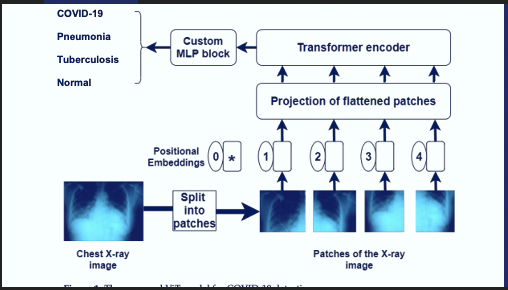

### The value of ViT models for X-ray classification
As with all medical imaging tasks, radiologists spend many years learning reliably and efficiently detect problems and make tentative diagnoses on the basis of X-ray images. To a large degree, this difficulty arises from the very minute differences and spatial limitations of the images, which is why computer aided detection and diagnosis (CAD) techniques have shown such great potential for impact in improving clinician workflows and patient outcomes.

At the same time, developing any model for X-ray classification (ViT or otherwise) will entail its fair share of challenges:

1. Training a model from scratch takes an enormous amount of labeled data;
2. The high resolution and volume requirements mean powerful compute is necessary to train such models; and
3. The complexity of multi-class and multi-label problems such as pulmonary diagnosis is exponentially compounded due to the number of disease categories.

The model we will use is https://huggingface.co/google/vit-base-patch16-224-in21k as it is a multi-label classification model.

We are going to train the ViT model to predict diseases (defined by "label") from the images. "label" can be any number of 3 diseases or a "Normal" label, which indicates that no disease was detected. To be compatible with the Hugging Face library, the text labels need to be transformed to N-hot encoded arrays representing the multiple labels which are needed to classify each image. An N-hot encoded array represents the labels as a list of booleans, true if the label corresponds to the image and false if not.

In [ ]:
def label_to_N_hot(label):
    labels = np.zeros((4,), dtype=float)
    labels[label] = 1
    return labels

onlyfiles = []
for root, dirs, files in os.walk(dataset_path):
    path = root.split(os.sep)
    relative_path = "\\".join(path[1:])
    for f in files:
        full_file_path = join(root, f)
        rel_file_path = join(relative_path, f)
        if isfile(full_file_path):
            onlyfiles.append((rel_file_path, label_to_N_hot(train_set.class_indices[path[2]])))

In [ ]:
json_data = pd.DataFrame(onlyfiles, columns=['file_name', 'labels'])

We have chosen to use a metadata.jsonl file loading data through the datasets.load_dataset function. We write the image file names and their associated labels to the metadata.jsonl file.

In [ ]:
json_data.to_json(join(dataset_path, 'metadata.jsonl'), orient='records', lines=True)

### Creating the dataset
We created the PyTorch dataset and split it into training and validation sets. This step converts the dataset to the Arrow file format which allows data to be loaded quickly during training and validation. Because the entire dataset is being loaded and pre-processed it can take a few minutes.

In [ ]:
train_val_split = 0.2
dataset = datasets.load_dataset(
    "imagefolder",
    data_dir='/content/dataset',
)

In [ ]:
split = dataset["train"].train_test_split(train_val_split)
dataset["train"] = split["train"]
dataset["validation"] = split["test"]

In [ ]:
dataset

In [ ]:
model = "google/vit-base-patch16-224-in21k"

### Loading AutoFeatureExtractor
To fine-tune a pre-trained model, the new dataset must have the same properties as the original dataset used for pre-training. In Hugging Face, the original dataset information is provided in a config file loaded using the AutoFeatureExtractor. For this model, the X-ray images are resized to the correct resolution (224x224), converted from grayscale to RGB, and normalized across the RGB channels with a mean (0.5, 0.5, 0.5) and a standard deviation (0.5, 0.5, 0.5).

For the model to run efficiently, images need to be batched.

In [ ]:
feature_extractor = transformers.AutoFeatureExtractor.from_pretrained(model)

In [ ]:
class XRayTransform:
    """
    Transforms for pre-processing XRay data across a batch.
    """
    def __init__(self):
        self.transforms = transforms.Compose([
            transforms.Lambda(lambda pil_img: pil_img.convert("RGB")),
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std),
        ])

    def __call__(self, example_batch):
        example_batch["pixel_values"] = [self.transforms(pil_img) for pil_img in example_batch["image"]]
        #example_batch["label"] = [example_batch[] for pil_img in example_batch["image"]]
        return example_batch


# Set the training transforms
dataset["train"].set_transform(XRayTransform())
# Set the validation transforms
dataset["validation"].set_transform(XRayTransform())

In [ ]:
def batch_sampler(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["labels"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

Let's take a look at the 400th example from the 'train' split from the dataset. We noticed that each example from the dataset has 3 features:

1. image: A PIL Image
2. labels: A list of labels feature, which is an integer representation of the label.
3. pixel_values: A pixel_values that we generate above

In [ ]:
dataset['train'][400]

In [ ]:
dataset['train'][400]['image']

Let's also plot some images from the validation set with their associated labels.

In [ ]:
fig = plt.figure(figsize=(20, 15))

unique_labels = np.unique(labeled_dataframe["label"])

for i, data_dict in enumerate(dataset['validation']):
    if i == 12:
        break
    image = data_dict["pixel_values"]
    label = data_dict["labels"]
    ax = plt.subplot(3, 4, i + 1)
    ax.set_title(", ".join(unique_labels[np.argwhere(label).flatten()]))
    plt.imshow(image[0])  # Plot only the first channel as they are all identical

fig.tight_layout()

### Preparing the model

Now we import the ViT model from Hugging Face.

In [ ]:
model = transformers.AutoModelForImageClassification.from_pretrained(
    model,
    num_labels=len(unique_labels)
    )

Let's set our training configuration by defining TrainingArguments.

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    evaluation_strategy="steps",
    num_train_epochs=4,
    save_steps=100,
    eval_steps=100,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to='tensorboard',
    load_best_model_at_end=True,
)

### Implementing a custom performance metric for evaluation
For this dataset, the AUC_ROC represents the ability of the model to separate the different diseases. A score of 0.5 means that it is 50% likely to get the correct disease and a score of 1 means that it can perfectly separate the diseases
The compute_metrics function takes the labels predicted by the ViT model and computes the area under the ROC curve. The compute_metrics function takes an EvalPrediction object (a named tuple with a predictions and label_ids field), and has to return a dictionary string to float.

In [ ]:
metric_auc = datasets.load_metric("roc_auc", "multilabel")
metric = load_metric("accuracy")

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)

    pred_scores = softmax(p.predictions.astype('float32'), axis=1)
    auc = metric_auc.compute(prediction_scores=pred_scores, references=p.label_ids, multi_class='ovo')['roc_auc']
    return {"roc_auc": auc}

To train the model, we define a trainer using the Trainer

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    compute_metrics=compute_metrics,
    tokenizer=feature_extractor,
    data_collator=batch_sampler
)

### Running the training

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

To accelerate training we will load the last checkpoint if it exists

In [ ]:
last_checkpoint = None
if os.path.isdir(training_args.output_dir) and not training_args.overwrite_output_dir:
    last_checkpoint = transformers.trainer_utils.get_last_checkpoint(training_args.output_dir)

Now that we have completed the training, we can format and plot the trainer output to evaluate the training behaviour.

In [ ]:
last_log = last_checkpoint + '/trainer_state.json'
with open(last_log, "rb") as f:
    log = json.loads(f.read())

# Put the trainer logs in a data frame
training_records = pd.DataFrame(log['log_history'])

We plot the training loss and the learning rate.

In [ ]:
fig, axs = plt.subplots(2, 1)
training_records.plot(x="epoch", y="loss", ax=axs[0])
training_records.plot(x="epoch", y="learning_rate", ax=axs[1])
fig.set_size_inches(8, 8)
fig.tight_layout()

The loss curve shows a rapid reduction in the loss at the start of training before stabilising around 0.1, showing that the model is learning.

### Running the evaluation
Now that we have trained the model, we can evaluate its ability to predict the labels of unseen data using the validation dataset.

In [ ]:
metrics = trainer.evaluate()
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

The ImageClassificationExplainer is designed to work with all models from the Transformers library that are trained for image classification (Swin, ViT etc). It provides attributions for every pixel in that image that can be easily visualized using the explainers built in visualize method.

We are using alpha_scaling method that sets alpha channel (transparency) of each pixel to be equal to normalized attribution value.

In [ ]:
def alpha_scaling():
    return image_classification_explainer.visualize(
      method="alpha_scaling",
      side_by_side=True,
      outlier_threshold=0.7
    )

In [ ]:
image_classification_explainer = ImageClassificationExplainer(model=model, feature_extractor=feature_extractor)
mapping = {}
images = ['dataset/test/Covid/1997_1.png', 'dataset/test/Normal/11886_0.png', 'dataset/test/Pneumonia/8045_0.png', 'dataset/test/Tuberculosis/10087_0.png']
for img in images:
    im=Image.open(img)
    np_img = np.array(im)
    image_attributions = image_classification_explainer(np_img)

    print(image_attributions.shape)
    torch.Size([1, 3, 224, 224])
    alpha_scaling()

Based on the alpha scaled, we can really see that the model predicted Covid and Tuberculosis mainly based on the lungs, but failed to identify Pneumonia by the correct indicators.
1. Covid19 - it marked the two lungs, which is reasonable as it seems that both of them has white masses that can indicate Covid19 infection.
2. Pneumonia - Seems that the model identified it by the black spaces on the right and left of the image.
3. Tuberculosis - we can see the black dots all over the lungs that indicate Tuberculosis in the marked area.

# Summary

In this research, we proposed a robust and interpretable deep learning models that can efficiently diagnose COVID-19, Pneumonia and Tuberculosis infections at scale in real-world situations for healthcare. For this objective, a 30K chest X-ray image collection was produced by combining several open-source data sets.

We tried to train many different models to identify lungs diseases, but the most promising ones with relatively high accuracy which identified the classes by the correct objects in the images were:
1. Our own improved CNN (%80 Accuracy)
2. ResNet50v2 (%82 Accuracy)
3. HOG based CNN (%93 Accuracy)

These models may be extremely valuable in areas where quick testing is unavailable, and it may also be used as a second screening method after the standard RT-PCR test to verify that any true negative or false positive cases do not occur.

## Working together
This project was a very intersting and fun way to learn a new field in computers science and also an interesting topic in the medical field (how to diagnose lung diseases from chest XRay images). We made a big effort to get our models accuracy better. We probably could have reached better results if we had more time - for better preprocessing of the images, and for more training cycles. However, we are happy with the results we achieved.

As part of this project we dealt with:

1. **Merging datasets** - We didn't want to only identify Pneumonia disease, so we had to merge a few datasets we found. We didn't understand at first how massive and challenging the cleaning of the datasets will be. This fact made us go through many iterations of cleaning the datasets to remove low quality and invalid images. It is important to note that because of PC memory limitation, we couldn't even use all the images we found and had to remove a lot in order to use general scikit-learn algorithms (like PCA or RandomForestClassifier which need all the images to be loaded in memory altogether).
2. **Overfitting** - The first CNN model we tried to train was very overfitted to a specific label, we didn't know at first how to improve the general accuracy of the model so we had to read a lot of research articles online to figure out how to improve it.
3. **Cleaning the datasets** - After the initial cleaning of the datasets, we continued to train models and discovered that we still had many images that were invalid - we had many iterations to try and identify images that had many black spaces in them or had big white rectangles. We think that we did a pretty good job identifying these images but it can still be improved as we see them popping out now and then when we evaluate the models.
4. **Children images** - We discovered really late that we had many images (mainly Pneumonia images) that are of children. The radiologist we spoke with told us that it is way harder to identify these diseases on children images, and these images also have some different characteristics then adult images. It seems that some of our models handled it well (like ResNet50v2), and some were completley off because of that (FastAI's ResNet34).
5. **Hardware limitations** - At first we tried using Colab and leaving it to train models overnight only to find out everything was deleted in the morning. Then we tried using our own computers but couldn't really train the models for a lot of time. We had a lot of environment issues until we successfuly ran training using our own GPU.

At first, we only tried to get the accuracy higher (more training epochs and tweaking the learning rate), but we discovered that most of the models identified classes by "metadata" instead of the real diseases indicators, and went back to cleaning the datasets to improve that.

## Improvements
1. **Cleaning the datasets** - We still have some images with big black spaces in them, and some with white rectangles that were left.
2. **VGG16 model** - The research article we followed suggested a bit different preprocessing techniques: 
    - We removed the objects on the images after we used equalize histogram algorithm, and they did it before (We didn't have a lot of luck removing the objects on images before using equalize histogram algorithm).
    - They combined 3 different images each was preprocessed differently into 1 RGB image but we didn't have the time to do that as well.
3. **Splitting data to train, validation and test sets** - We did it randomaly but read online that it can really affect model accuracy.

## Personal note
Both of us didn't have any knowledge in this field, and we just didn't expect to learn so much from this project.

When we chose this topic we didn't think the project will be that big and require so much time and effort.

We are really happy we did this project and learned new tools we can use in the future in many different projects.